
#**Delhivery:**

**About Delhivery:**

 Delhivery is an Indian logistics and supply chain company, based in Gurgaon.
Also it is the largest and fastest-growing fully integrated player in India by
revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

###**Problem Statement:**

We have been given data on trips performed by parcels for Delhivery, which has attributes like trip_creation_time, routes, source and destination places, and open-source routing engine time. We need to clean, sanitize and manipulate data and get useful features and provide data to help them build forecasting models.

In [ ]:
# importing the required modules and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import norm,zscore,boxcox,probplot
from scipy.stats import ttest_ind,ttest_rel,mannwhitneyu,wilcoxon
from scipy.stats import shapiro,levene,kstest,anderson
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , MinMaxScaler , OneHotEncoder

In [ ]:
df=pd.read_csv('delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### **Exploring the Data:**

In [ ]:
df.shape

(144867, 24)

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

###**Statistical Summary:**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
cutoff_factor,144867.0,232.926567,344.755577,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
factor,144867.0,2.120107,1.715421,0.144000,1.604264,1.857143,2.213483,77.387097
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
data,144867,2,training,104858
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144867,2,FTL,99660
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81


###**Dataset Information:**

data: It contains whether the data is testing or training type

trip_creation_time: It is the timestamp of trip_creation.  It ranges from '2018-09-12 00:25:19.499696' to '2018-10-03 23:59:42.701692'

oute_schedule_uuid: it is unique_id for particular route schedule

route type: It contains whether the route is Full Truck Load or Carting type

trip_uuid:  It is a unique id associated with a particular trip

source_center: It is the ID of the origin of the trip

source_name: Its the name of the origin of the trip

destination_center: It is the ID of the destination of the trip

destination_name: It is the name of the destination of the trip

od_start_time: It is the trip start time

od_end_time: It is the trip end time

Start_scan_to_end_scan: It gives the time taken to deliver from source to destination. It ranges from 20 to 7898.

is_cutoff: It is an unknown field, which is boolean

cutoff_factor: It is the rounded value of the actual_distance_to_destination, it ranges from 9 to 1927

cutoff_timestamp: It is an unknown field

actual_distance_to_destination: It is the distance between the source and destination warehouses, it ranges from 9.00 to 1927.44

actual_time: It contains the actual time taken to complete the delivery (cumulative), it ranges from 9 to 4532.

osrm_time: It is an open-source routing engine time calculator which computes the shortest path between points in a given
map and gives the time (cumulative), it ranges from 6 to 1686

osrm_distance: It contains the distance to the destination based on osrm, it ranges from 9.00 to 2326.199

factor: It is a ratio of actual_time to osrm_time, it ranges from 0.144 to 77.38.

segment_actual_time: It is a segment time, a time taken by a subset of package delivery, It ranges from -244 to 3051

segment_osrm_time: It contains the orsm time taken by a subset of the package delivery. It ranges from 0 to 1611

segment_osrm_distance: It contains OSRM distance, the distance covered by a subset of package delivery, it ranges from 0 to 2191.40

segment_factor: It is a ratio between segment_actual_time to segment_osrm_time, it ranges from -23.544 to 574.25

In [ ]:
#Duplicate Detection
df.duplicated().sum()

0

In [ ]:
df[df.duplicated()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


**Insights:**



*  There are no duplicate in the data



**Null Detection:**

In [ ]:
df.isna().any()

,0
data,False
trip_creation_time,False
route_schedule_uuid,False
route_type,False
trip_uuid,False
source_center,False
source_name,True
destination_center,False
destination_name,True
od_start_time,False


In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
source_name,293
destination_name,261
data,0
cutoff_factor,0
segment_osrm_distance,0
segment_osrm_time,0
segment_actual_time,0
factor,0
osrm_distance,0
osrm_time,0


In [ ]:
#Nulls percentage
missing_percentage= pd.DataFrame(df.isna().sum().sort_values(ascending=False)/df.shape[0]*100,columns=['percentage'])
missing_percentage[missing_percentage['percentage']>0]

,percentage
source_name,0.202254
destination_name,0.180165


In [ ]:
#Dropping unknown Fields
unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df = df.drop(columns = unknown_fields)

In [ ]:
df.sample(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
45861,training,2018-09-25 04:03:47.106956,thanos::sroute:25dd334d-e30d-4cfa-b6e8-192bcfe...,FTL,trip-153784822710655499,IND712311AAA,Kolkata_Dankuni_HB (West Bengal),IND751002AAB,Bhubaneshwar_Hub (Orissa),2018-09-25 04:03:47.106956,2018-09-25 20:46:20.648300,1002.0,111.909881,215.0,91.0,128.8282,29.0,17.0,24.3579
64645,training,2018-09-19 02:05:56.874255,thanos::sroute:a8c7e9f0-237d-47a1-9024-a48afeb...,FTL,trip-153732275687388657,IND302014AAA,Jaipur_Hub (Rajasthan),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-19 02:05:56.874255,2018-09-19 10:25:47.435584,499.0,177.540349,259.0,153.0,194.4839,31.0,23.0,24.7847
22482,training,2018-09-21 22:17:03.346634,thanos::sroute:bcce7b68-e962-4a29-af24-167e3e9...,FTL,trip-153756822334638853,IND781018AAB,Guwahati_Hub (Assam),IND110037AAM,Delhi_Airport_H (Delhi),2018-09-21 22:17:03.346634,2018-09-24 09:26:30.874295,3549.0,484.296891,1022.0,427.0,554.4883,23.0,15.0,22.4031
120654,training,2018-09-25 04:21:12.551117,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153784927255069118,IND854326AAB,Purnia_Central_H_2 (Bihar),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-26 16:05:31.267440,2018-09-28 01:54:50.522462,2029.0,924.266090,1637.0,790.0,1067.9478,24.0,22.0,31.3465
65648,test,2018-10-01 18:09:18.424636,thanos::sroute:c08130ce-88ec-4afe-bee2-13999d5...,FTL,trip-153841735842439963,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-10-01 18:09:18.424636,2018-10-02 15:17:25.039817,1268.0,177.089570,305.0,145.0,194.1458,26.0,17.0,24.5211


In [ ]:
df.shape

(144867, 19)

**Changing the Data types of the columns:**

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

In [ ]:
df.nunique()

,0
data,2
trip_creation_time,14817
route_schedule_uuid,1504
route_type,2
trip_uuid,14817
source_center,1508
source_name,1498
destination_center,1481
destination_name,1468
od_start_time,26369


In [ ]:
#Changing the columns data and route_type as categorical as there are only 2 unique values
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

#Converting the time columns to datatime format
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
# Time period of the data
(df['trip_creation_time'].min(), df['trip_creation_time'].max(), df['trip_creation_time'].max()-df['trip_creation_time'].min())

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-03 23:59:42.701692'),
 Timedelta('21 days 23:59:26.165951'))

In [ ]:
#Time period of the data
(df['od_start_time'].min(), df['od_start_time'].max(), df['od_start_time'].max()-df['od_start_time'].min())

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-06 04:27:23.392375'),
 Timedelta('24 days 04:27:06.856634'))

In [ ]:
#Time period of the data
(df['od_end_time'].min(), df['od_end_time'].max(), df['od_end_time'].max()-df['od_end_time'].min())

(Timestamp('2018-09-12 00:50:10.814399'),
 Timestamp('2018-10-08 03:00:24.353479'),
 Timedelta('26 days 02:10:13.539080'))

In [ ]:
Data_set_time_period = ( df['od_end_time'].max()-df['trip_creation_time'].min())
Data_set_time_period

Timedelta('26 days 03:00:07.817738')

**Null Treatment:**

In [ ]:
missing_percentage[missing_percentage['percentage']>0]

,percentage
source_name,0.202254
destination_name,0.180165


In [ ]:
df[df.source_name.isna()&df.destination_name.isna()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
68006,training,2018-09-26 22:21:56.619259,thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...,FTL,trip-153800051661903546,IND331022A1B,NaN,IND331001A1C,NaN,2018-09-27 03:19:14.797080,2018-09-27 05:28:00.922915,128.0,25.178605,26.0,23.0,25.7246,26.0,23.0,25.7246
68007,training,2018-09-26 22:21:56.619259,thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...,FTL,trip-153800051661903546,IND331022A1B,NaN,IND331001A1C,NaN,2018-09-27 03:19:14.797080,2018-09-27 05:28:00.922915,128.0,45.101167,114.0,44.0,54.6110,88.0,21.0,28.8863
68008,training,2018-09-26 22:21:56.619259,thanos::sroute:cfb575b8-df26-48f5-8427-6f48f9d...,FTL,trip-153800051661903546,IND331022A1B,NaN,IND331001A1C,NaN,2018-09-27 03:19:14.797080,2018-09-27 05:28:00.922915,128.0,50.844665,128.0,49.0,60.9205,13.0,4.0,6.3096


In [ ]:
df.source_name.isna().sum(), df.destination_name.isna().sum()

(293, 261)

In [ ]:
df.shape

(144867, 19)


As the null percentage is found to be very low and the dataset is sufficiently large, imputing these null values with arbitrary constants would lead to unnecessary analysis related to these added values. Consequently, it is advisable to remove those records directly.


In [ ]:
df_copy=df.copy()

In [ ]:
#count of the colums to be dropped
df= df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  category      
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  category      
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


**Insights:**

* Only two fields have a very small percentage of missing values, accounting for less than 0.05% of the entire dataset.
* Given the ample amount of data available, we have opted to remove the missing values rather than estimate them using methods such as the average or most common value.
* Omitting the missing values helps maintain simplicity and preserves the distribution of the features.
* If a significantly larger portion of data were missing, we might have considered alternative approaches, such as estimation based on existing values or using the most frequent values.




## **Exploratary Data Analysis:**

In [ ]:
df.sample(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
69146,test,2018-10-02 21:16:47.970695,thanos::sroute:65298ce5-d9ee-4614-80fe-0b619cf...,FTL,trip-153851500797048755,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND302014AAA,Jaipur_Hub (Rajasthan),2018-10-02 21:16:47.970695,2018-10-05 00:01:10.410975,3044.0,1342.098173,2252.0,1177.0,1607.4059,36.0,17.0,25.0658
28002,training,2018-09-21 06:36:42.638173,thanos::sroute:1b3b307a-9fc7-471e-94b2-45bc84d...,FTL,trip-153751180263790711,IND411033AAA,Pune_Tathawde_H (Maharashtra),IND416012AAA,Kolhapur_Shivaji_I (Maharashtra),2018-09-21 06:36:42.638173,2018-09-21 16:04:31.112558,567.0,220.028236,335.0,220.0,249.3123,29.0,27.0,23.6832
112909,training,2018-09-17 21:20:14.657095,thanos::sroute:02f15a99-a1b6-4265-acff-749e838...,FTL,trip-153721921465681274,IND277201AAA,Bariya_BgnprDPP_D (Uttar Pradesh),IND221706AAA,Ratanpura_MubarDPP_D (Uttar Pradesh),2018-09-18 04:49:43.001655,2018-09-18 07:17:05.441387,147.0,66.017509,113.0,55.0,78.1473,34.0,22.0,24.6703


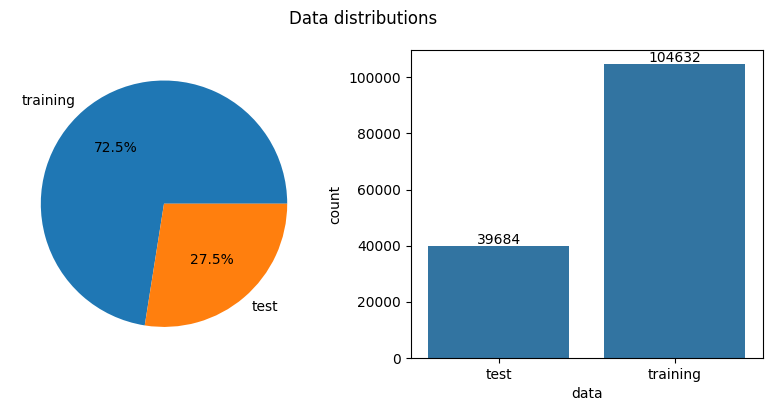

In [ ]:
#ploting the pie plot for the data column
plt.figure(figsize=(10,4))
plt.suptitle('Data distributions')
plt.subplot(1,2,1)
plt.pie(df['data'].value_counts(),labels=df['data'].value_counts().index,autopct='%1.1f%%')
plt.subplot(1,2,2)
a=sns.barplot(y=df['data'].value_counts(),x= df['data'].value_counts().index)
a.bar_label(a.containers[0])
plt.show()

In [ ]:
df['route_type'].value_counts()

,count
route_type,
FTL,99132
Carting,45184


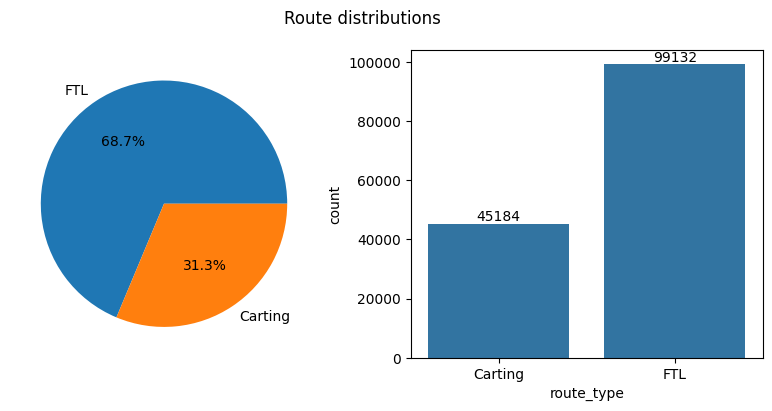

In [ ]:
#ploting the pie plot for the data column
plt.figure(figsize=(10,4))
plt.suptitle('Route distributions')
plt.subplot(1,2,1)
plt.pie(df['route_type'].value_counts(),labels=df['route_type'].value_counts().index,autopct='%1.1f%%')
plt.subplot(1,2,2)
a=sns.barplot(y=df['route_type'].value_counts(),x= df['route_type'].value_counts().index)
a.bar_label(a.containers[0])
plt.show()



In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [ ]:
Numeric_colums=['actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance']

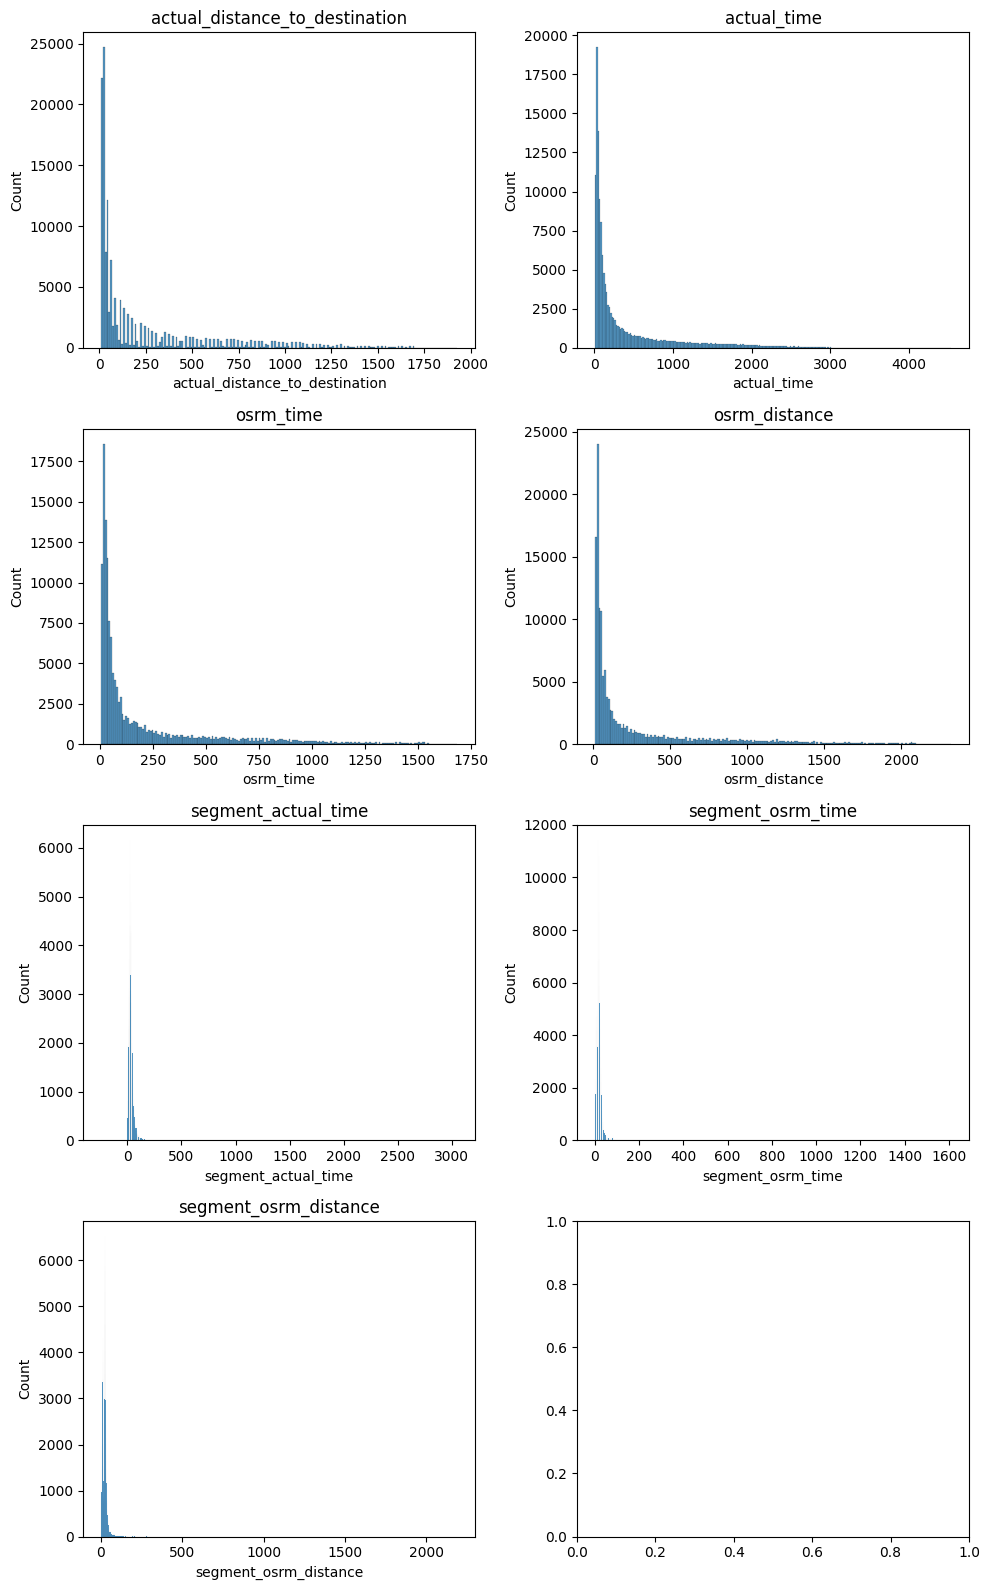

In [ ]:
import math
num_cols = 2
num_rows = math.ceil(len(Numeric_colums) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4 * num_rows))

for i, col in enumerate(Numeric_colums):
    row_index = i // num_cols  # Calculate row index
    col_index = i % num_cols  # Calculate column index
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]

    sns.histplot(df[col], ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

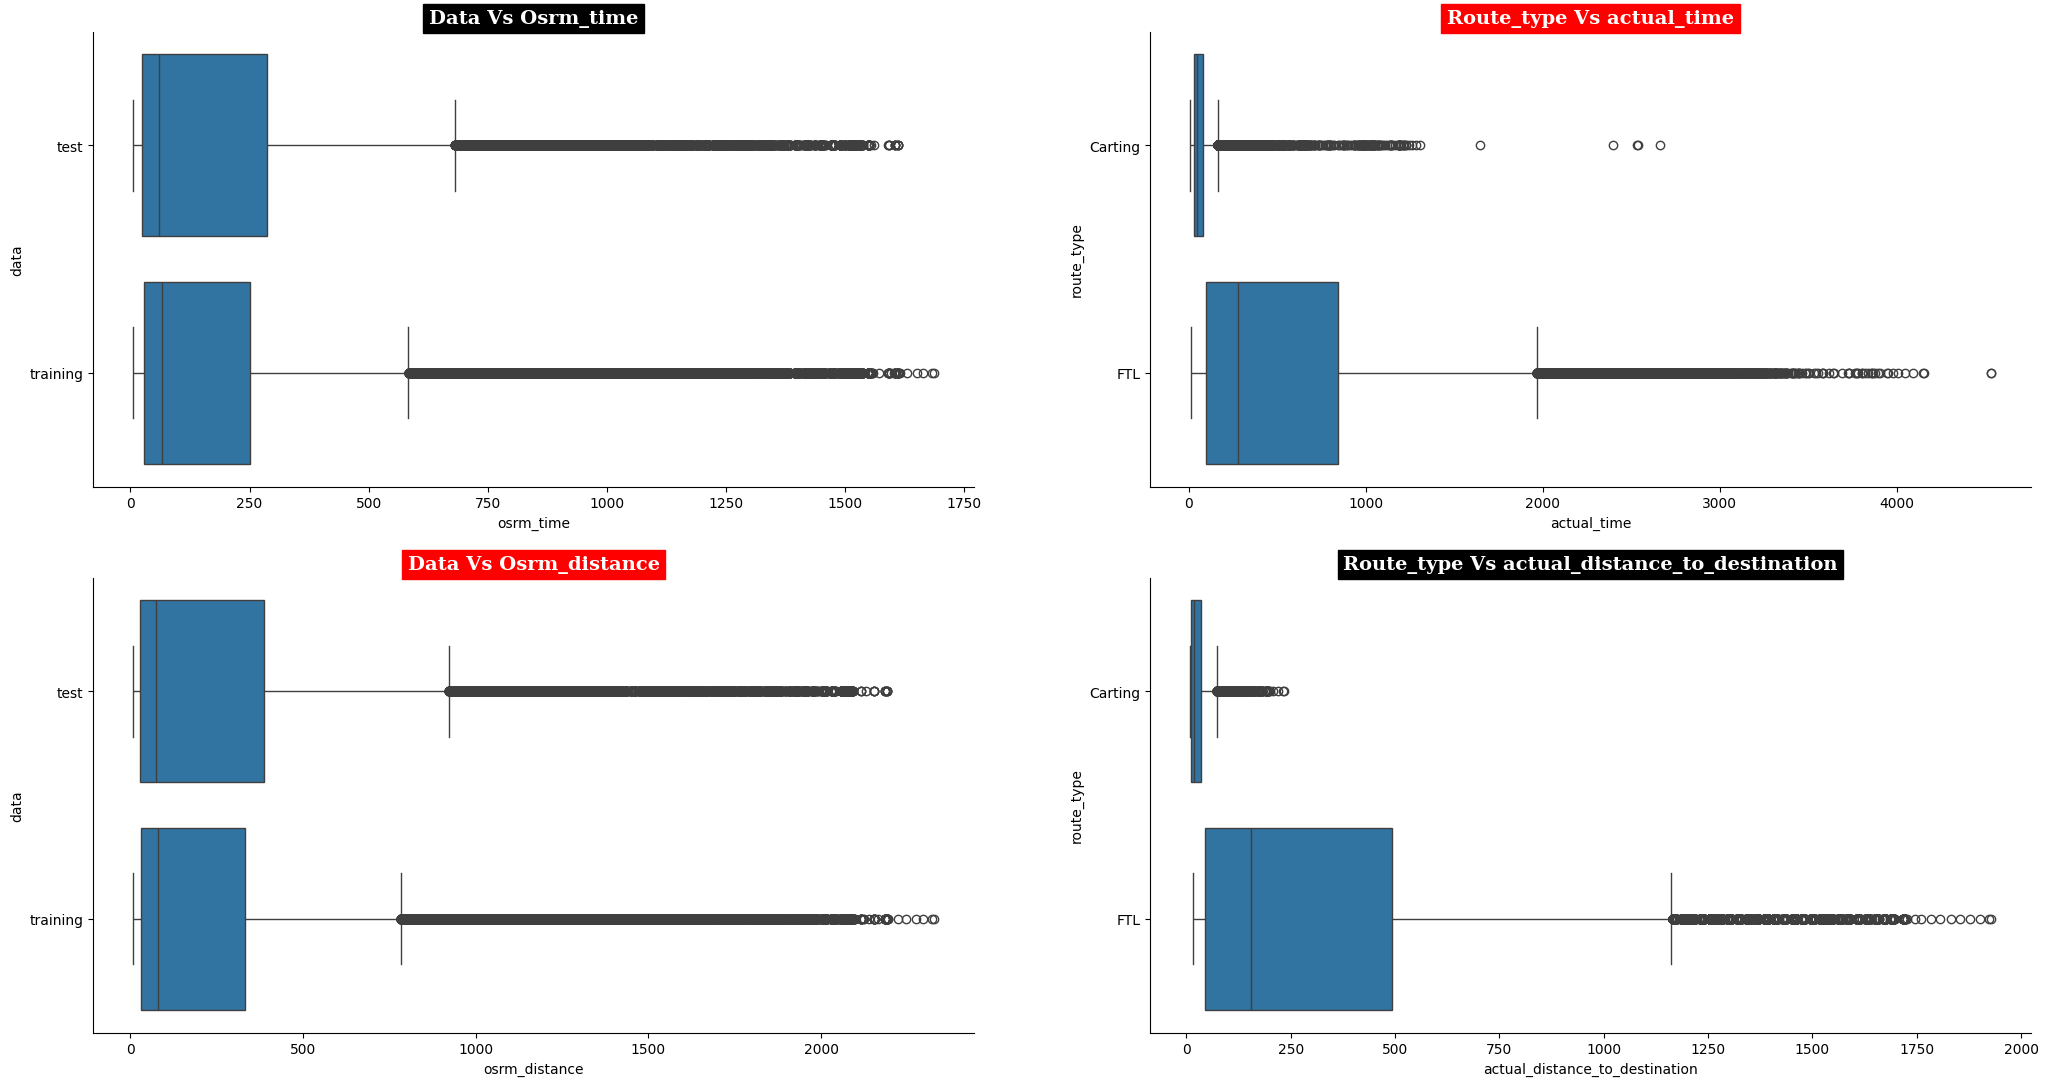

In [ ]:
plt.figure(figsize=(25,13))

plt.subplot(221)
sns.boxplot(data=df,y='data',x='osrm_time')
plt.title('Data Vs Osrm_time',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')

plt.subplot(222)
sns.boxplot(data=df,y='route_type',x='actual_time')
plt.title('Route_type Vs actual_time',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')

plt.subplot(223)
sns.boxplot(data=df,y='data',x='osrm_distance')
plt.title('Data Vs Osrm_distance',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')

plt.subplot(224)
sns.boxplot(data=df,y='route_type',x='actual_distance_to_destination')
plt.title('Route_type Vs actual_distance_to_destination',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
sns.despine()
plt.show()

**Insights:**

* The training and test datasets exhibit the same range of recorded OSRM times.
* The FTL route type shows a greater actual time compared to Carting, likely due to FTL being used more frequently in the available data.
* Both training and test datasets demonstrate the same range of recorded OSRM distances.
* The FTL route type also has a greater actual distance compared to Carting, which may be attributed to the higher frequency of FTL usage in the data.




### **Merging of rows and aggregation of fields:**

In [ ]:
# Grouping by segment
# Creating a unique identifier for each segment of a trip

segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

df['segment_key'] = df['trip_uuid'] + '+' + df['source_center'] + '+' + df['destination_center']

for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()

df[['segment_key', 'segment_actual_time', 'segment_actual_time_sum','segment_osrm_distance', 'segment_osrm_distance_sum','segment_osrm_time', 'segment_osrm_time_sum']]

,segment_key,segment_actual_time,segment_actual_time_sum,segment_osrm_distance,segment_osrm_distance_sum,segment_osrm_time,segment_osrm_time_sum
0,trip-153741093647649320+IND388121AAA+IND388620AAB,14.0,14.0,11.9653,11.9653,11.0,11.0
1,trip-153741093647649320+IND388121AAA+IND388620AAB,10.0,24.0,9.7590,21.7243,9.0,20.0
2,trip-153741093647649320+IND388121AAA+IND388620AAB,16.0,40.0,10.8152,32.5395,7.0,27.0
3,trip-153741093647649320+IND388121AAA+IND388620AAB,21.0,61.0,13.0224,45.5619,12.0,39.0
4,trip-153741093647649320+IND388121AAA+IND388620AAB,6.0,67.0,3.9153,49.4772,5.0,44.0
...,...,...,...,...,...,...,...
144862,trip-153746066843555182+IND131028AAB+IND000000ACB,12.0,92.0,8.1858,65.3487,12.0,94.0
144863,trip-153746066843555182+IND131028AAB+IND000000ACB,26.0,118.0,17.3725,82.7212,21.0,115.0
144864,trip-153746066843555182+IND131028AAB+IND000000ACB,20.0,138.0,20.7053,103.4265,34.0,149.0
144865,trip-153746066843555182+IND131028AAB+IND000000ACB,17.0,155.0,18.8885,122.3150,27.0,176.0


In [ ]:
# Aggregating at segment level & Creating a dictionary for aggregation at segment level

segment_dict = {
  'trip_uuid' : 'first',
  'data': 'first',
  'route_type': 'first',
  'trip_creation_time': 'first',
  'source_name': 'first',
  'destination_name': 'last',
  'od_start_time': 'first',
  'od_end_time': 'last',
  'start_scan_to_end_scan': 'first',
  'actual_distance_to_destination': 'last',
  'actual_time': 'last',
  'osrm_time': 'last',
  'osrm_distance': 'last',
  'segment_actual_time' : 'sum',
  'segment_osrm_time' : 'sum',
  'segment_osrm_distance' : 'sum',
  'segment_actual_time_sum': 'last',
  'segment_osrm_time_sum': 'last',
  'segment_osrm_distance_sum': 'last',
}

# Grouping by segment_key and aggregating
segment_agg_data = df.groupby('segment_key').agg(segment_dict).reset_index()
segment_agg_data = segment_agg_data.sort_values(by=['segment_key','od_end_time'])
segment_agg_data

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,728.0,534.0,670.6205
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,820.0,474.0,649.8528
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,46.0,26.0,28.1995
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,95.0,39.0,55.9899
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069+IND628204AAA+IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,49.0,42.0,42.1431
26218,trip-153861115439069069+IND628613AAA+IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,89.0,77.0,78.5869
26219,trip-153861115439069069+IND628801AAA+IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,29.0,14.0,16.0184
26220,trip-153861118270144424+IND583119AAA+IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303,233.0,42.0,52.5303


 The rows have been merged based on the unique segment_key, which is a combination of trip_uuid, source_center, and destination_center.

 The aggregated dataset reflects the total values for each segment of the trip.

### **Feature Engineering:**

In [ ]:
segment_agg_data.sample()

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
19974,trip-153809059186037484+IND506132AAA+IND122001AAJ,trip-153809059186037484,test,FTL,2018-09-27 23:23:11.860611,Khanpur_Nrsampt_D (Telangana),Mahbubabad_Yellanda_D (Telangana),2018-09-28 00:59:11.237832,2018-09-28 02:09:50.608172,70.0,38.369554,69.0,35.0,48.6196,68.0,35.0,48.6197,68.0,35.0,48.6197


In [ ]:
# 1. Calculating time difference between od_start_time and od_end_time
segment_agg_data['od_total_time']=(segment_agg_data['od_end_time'] - segment_agg_data['od_start_time'])
segment_agg_data['od_time_diff_hour'] = (segment_agg_data['od_total_time']).dt.total_seconds()/3600
segment_agg_data

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_total_time,od_time_diff_hour
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,...,329.0,446.5496,728.0,534.0,670.6205,728.0,534.0,670.6205,0 days 21:00:36.265275,21.010074
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,...,388.0,544.8027,820.0,474.0,649.8528,820.0,474.0,649.8528,0 days 16:39:30.322728,16.658423
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,...,26.0,28.1994,46.0,26.0,28.1995,46.0,26.0,28.1995,0 days 00:58:49.943264,0.980540
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,...,42.0,56.9116,95.0,39.0,55.9899,95.0,39.0,55.9899,0 days 02:02:46.769161,2.046325
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,...,212.0,281.2109,608.0,231.0,317.7408,608.0,231.0,317.7408,0 days 13:54:38.335721,13.910649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069+IND628204AAA+IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,...,41.0,42.5213,49.0,42.0,42.1431,49.0,42.0,42.1431,0 days 01:02:06.911603,1.035253
26218,trip-153861115439069069+IND628613AAA+IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,...,48.0,40.6080,89.0,77.0,78.5869,89.0,77.0,78.5869,0 days 01:31:05.267810,1.518130
26219,trip-153861115439069069+IND628801AAA+IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,...,14.0,16.0185,29.0,14.0,16.0184,29.0,14.0,16.0184,0 days 00:44:10.464194,0.736240
26220,trip-153861118270144424+IND583119AAA+IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,...,42.0,52.5303,233.0,42.0,52.5303,233.0,42.0,52.5303,0 days 04:47:28.440393,4.791233


In [ ]:
segment_agg_data.sample()

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_total_time,od_time_diff_hour
1874,trip-153685117312046850+IND000000ACB+IND201007AAA,trip-153685117312046850,training,Carting,2018-09-13 15:06:13.120716,Gurgaon_Bilaspur_HB (Haryana),GZB_Mohan_Nagar_DPC (Uttar Pradesh),2018-09-13 15:06:13.120716,2018-09-13 19:23:11.127118,256.0,...,74.0,70.6777,138.0,79.0,73.3683,138.0,79.0,73.3683,0 days 04:16:58.006402,4.28278


In [ ]:
de = segment_agg_data.copy()

In [ ]:
de[['source_city', 'source_place', 'source_state']] = de['source_name'].str.extract(r'([^(_]+?)(?:_(.*?))? \(([^)]+)\)')
de[['destination_city', 'destination_place', 'destination_state']] = de['destination_name'].str.extract(r'([^(_]+?)(?:_(.*?))? \(([^)]+)\)')

In [ ]:
de['source_place'] = de['source_place'].fillna('')
de['destination_place'] = de['destination_place'].fillna('')

In [ ]:
de.head(7)

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,segment_osrm_time_sum,segment_osrm_distance_sum,od_total_time,od_time_diff_hour,source_city,source_place,source_state,destination_city,destination_place,destination_state
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,...,534.0,670.6205,0 days 21:00:36.265275,21.010074,Kanpur,Central_H_6,Uttar Pradesh,Gurgaon,Bilaspur_HB,Haryana
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,...,474.0,649.8528,0 days 16:39:30.322728,16.658423,Bhopal,Trnsport_H,Madhya Pradesh,Kanpur,Central_H_6,Uttar Pradesh
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,...,26.0,28.1995,0 days 00:58:49.943264,0.980540,Doddablpur,ChikaDPP_D,Karnataka,Chikblapur,ShntiSgr_D,Karnataka
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,...,39.0,55.9899,0 days 02:02:46.769161,2.046325,Tumkur,Veersagr_I,Karnataka,Doddablpur,ChikaDPP_D,Karnataka
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,...,231.0,317.7408,0 days 13:54:38.335721,13.910649,Gurgaon,Bilaspur_HB,Haryana,Chandigarh,Mehmdpur_H,Punjab
5,trip-153671043369099517+IND562132AAA+IND000000ACB,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,...,1710.0,2227.5270,2 days 03:39:43.415483,51.662060,Bangalore,Nelmngla_H,Karnataka,Gurgaon,Bilaspur_HB,Haryana
6,trip-153671046011330457+IND400072AAB+IND401104AAA,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,...,16.0,19.8766,0 days 01:40:29.696112,1.674916,Mumbai Hub,,Maharashtra,Mumbai,MiraRd_IP,Maharashtra


In [ ]:
de[(de['source_place'] == '') | (de['destination_place']=='')]

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,segment_osrm_time_sum,segment_osrm_distance_sum,od_total_time,od_time_diff_hour,source_city,source_place,source_state,destination_city,destination_place,destination_state
6,trip-153671046011330457+IND400072AAB+IND401104AAA,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,...,16.0,19.8766,0 days 01:40:29.696112,1.674916,Mumbai Hub,,Maharashtra,Mumbai,MiraRd_IP,Maharashtra
7,trip-153671052974046625+IND583101AAA+IND583201AAA,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,152.0,...,45.0,63.6461,0 days 02:32:00.774868,2.533549,Bellary,Dc,Karnataka,Hospet,,Karnataka
9,trip-153671052974046625+IND583201AAA+IND583119AAA,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 02:34:10.515593,2018-09-12 03:54:43.114421,80.0,...,26.0,29.5697,0 days 01:20:32.598828,1.342389,Hospet,,Karnataka,Sandur,WrdN1DPP_D,Karnataka
13,trip-153671066826362165+IND560043AAC+IND560064AAA,trip-153671066826362165,training,Carting,2018-09-12 00:04:28.263977,HBR Layout PC (Karnataka),Bengaluru_NwYlhnka_DC (Karnataka),2018-09-12 00:04:28.263977,2018-09-12 01:13:03.560690,68.0,...,18.0,13.8433,0 days 01:08:35.296713,1.143138,HBR Layout PC,,Karnataka,Bengaluru,NwYlhnka_DC,Karnataka
14,trip-153671066826362165+IND560064AAD+IND560043AAC,trip-153671066826362165,training,Carting,2018-09-12 00:04:28.263977,Bengaluru_Bagaluru_D (Karnataka),HBR Layout PC (Karnataka),2018-09-12 01:42:40.156332,2018-09-12 03:00:55.163423,78.0,...,16.0,15.0770,0 days 01:18:15.007091,1.304169,Bengaluru,Bagaluru_D,Karnataka,HBR Layout PC,,Karnataka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26153,trip-153860958923357924+IND842003AAB+IND482002AAA,trip-153860958923357924,test,Carting,2018-10-03 23:33:09.233829,Jabalpur_Adhartal_IP (Madhya Pradesh),Jabalpur (Madhya Pradesh),2018-10-03 23:33:09.233829,2018-10-04 07:48:23.711056,495.0,...,8.0,10.5521,0 days 08:15:14.477227,8.254021,Jabalpur,Adhartal_IP,Madhya Pradesh,Jabalpur,,Madhya Pradesh
26180,trip-153861007249500192+IND842001AAA+IND846004AAA,trip-153861007249500192,test,FTL,2018-10-03 23:41:12.495257,Muzaffrpur_Bbganj_I (Bihar),Darbhanga (Bihar),2018-10-03 23:41:12.495257,2018-10-04 02:17:56.235080,156.0,...,49.0,68.2751,0 days 02:36:43.739823,2.612150,Muzaffrpur,Bbganj_I,Bihar,Darbhanga,,Bihar
26181,trip-153861007249500192+IND846004AAA+IND847103AAA,trip-153861007249500192,test,FTL,2018-10-03 23:41:12.495257,Darbhanga (Bihar),Benipur_Javahar_D (Bihar),2018-10-04 02:17:56.235080,2018-10-04 04:20:42.531207,122.0,...,23.0,25.5966,0 days 02:02:46.296127,2.046193,Darbhanga,,Bihar,Benipur,Javahar_D,Bihar
26209,trip-153861091843037040+IND400072AAB+IND401104AAA,trip-153861091843037040,test,Carting,2018-10-03 23:55:18.430664,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-10-03 23:55:18.430664,2018-10-04 01:23:31.389882,88.0,...,16.0,20.5065,0 days 01:28:12.959218,1.470266,Mumbai Hub,,Maharashtra,Mumbai,MiraRd_IP,Maharashtra


In [ ]:
de.loc[de['source_place']=='','source_place']=de['source_city']
de.loc[de['destination_place']=='','destination_place']=de['destination_city']

In [ ]:
de.head(7)

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,segment_osrm_time_sum,segment_osrm_distance_sum,od_total_time,od_time_diff_hour,source_city,source_place,source_state,destination_city,destination_place,destination_state
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,...,534.0,670.6205,0 days 21:00:36.265275,21.010074,Kanpur,Central_H_6,Uttar Pradesh,Gurgaon,Bilaspur_HB,Haryana
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,...,474.0,649.8528,0 days 16:39:30.322728,16.658423,Bhopal,Trnsport_H,Madhya Pradesh,Kanpur,Central_H_6,Uttar Pradesh
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,...,26.0,28.1995,0 days 00:58:49.943264,0.980540,Doddablpur,ChikaDPP_D,Karnataka,Chikblapur,ShntiSgr_D,Karnataka
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,...,39.0,55.9899,0 days 02:02:46.769161,2.046325,Tumkur,Veersagr_I,Karnataka,Doddablpur,ChikaDPP_D,Karnataka
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,...,231.0,317.7408,0 days 13:54:38.335721,13.910649,Gurgaon,Bilaspur_HB,Haryana,Chandigarh,Mehmdpur_H,Punjab
5,trip-153671043369099517+IND562132AAA+IND000000ACB,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,...,1710.0,2227.5270,2 days 03:39:43.415483,51.662060,Bangalore,Nelmngla_H,Karnataka,Gurgaon,Bilaspur_HB,Haryana
6,trip-153671046011330457+IND400072AAB+IND401104AAA,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,...,16.0,19.8766,0 days 01:40:29.696112,1.674916,Mumbai Hub,Mumbai Hub,Maharashtra,Mumbai,MiraRd_IP,Maharashtra


In [ ]:
de.isna().sum()

,0
segment_key,0
trip_uuid,0
data,0
route_type,0
trip_creation_time,0
source_name,0
destination_name,0
od_start_time,0
od_end_time,0
start_scan_to_end_scan,0


In [ ]:
de['source_city'].unique()

array(['Kanpur', 'Bhopal', 'Doddablpur', ..., 'Mahasamund', 'Badkulla',
       'Kapadvanj'], dtype=object)

In [ ]:
de['destination_city'].unique()

array(['Gurgaon', 'Kanpur', 'Chikblapur', ..., 'Ranaghat', 'Kapadvanj',
       'Lunawada'], dtype=object)

In [ ]:
de['source_city'].value_counts()

,count
source_city,
Bengaluru,1136
Gurgaon,1130
Bhiwandi,821
Bangalore,792
Mumbai,719
...,...
Madnapalle,1
Naharlagun,1
Amalner,1


In [ ]:
de.loc[de['source_city'] == 'Bangalore','source_city'] ='Bengaluru'
de.loc[de['destination_city']== 'Bangalore','destination_city'] ='Bengaluru'

In [ ]:
de['source_city'].value_counts()

,count
source_city,
Bengaluru,1928
Gurgaon,1130
Bhiwandi,821
Mumbai,719
Delhi,626
...,...
Madnapalle,1
Naharlagun,1
Amalner,1


In [ ]:
de['destination_city'].value_counts()

,count
destination_city,
Bengaluru,1863
Mumbai,1000
Gurgaon,986
Hyderabad,643
Bhiwandi,614
...,...
Dhoraji,1
Kothanalloor,1
Baghpat,1


In [ ]:
de['source_state'].unique()

array(['Uttar Pradesh', 'Madhya Pradesh', 'Karnataka', 'Haryana',
       'Maharashtra', 'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana',
       'Andhra Pradesh', 'Rajasthan', 'Assam', 'West Bengal', 'Punjab',
       'Chandigarh', 'Goa', 'Uttarakhand', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Himachal Pradesh', 'Kerala', 'Arunachal Pradesh',
       'Bihar', 'Meghalaya', 'Chhattisgarh', 'Jammu & Kashmir',
       'Dadra and Nagar Haveli', 'Mizoram', 'Tripura', 'Nagaland'],
      dtype=object)

In [ ]:
de['destination_state'].unique()

array(['Haryana', 'Uttar Pradesh', 'Karnataka', 'Punjab', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Andhra Pradesh', 'Telangana',
       'Rajasthan', 'Madhya Pradesh', 'Assam', 'West Bengal',
       'Chandigarh', 'Dadra and Nagar Haveli', 'Orissa', 'Uttarakhand',
       'Bihar', 'Jharkhand', 'Pondicherry', 'Goa', 'Himachal Pradesh',
       'Kerala', 'Arunachal Pradesh', 'Mizoram', 'Chhattisgarh',
       'Jammu & Kashmir', 'Meghalaya', 'Nagaland', 'Tripura',
       'Daman & Diu'], dtype=object)

In [ ]:
de['source_state'].value_counts()

,count
source_state,
Maharashtra,3565
Karnataka,3445
Tamil Nadu,2130
Haryana,2039
Uttar Pradesh,1818
Telangana,1474
Gujarat,1401
West Bengal,1368
Andhra Pradesh,1310


In [ ]:
de['destination_state'].value_counts()

,count
destination_state,
Karnataka,3497
Maharashtra,3473
Tamil Nadu,2111
Haryana,2014
Uttar Pradesh,1828
Telangana,1539
Gujarat,1401
West Bengal,1399
Andhra Pradesh,1309


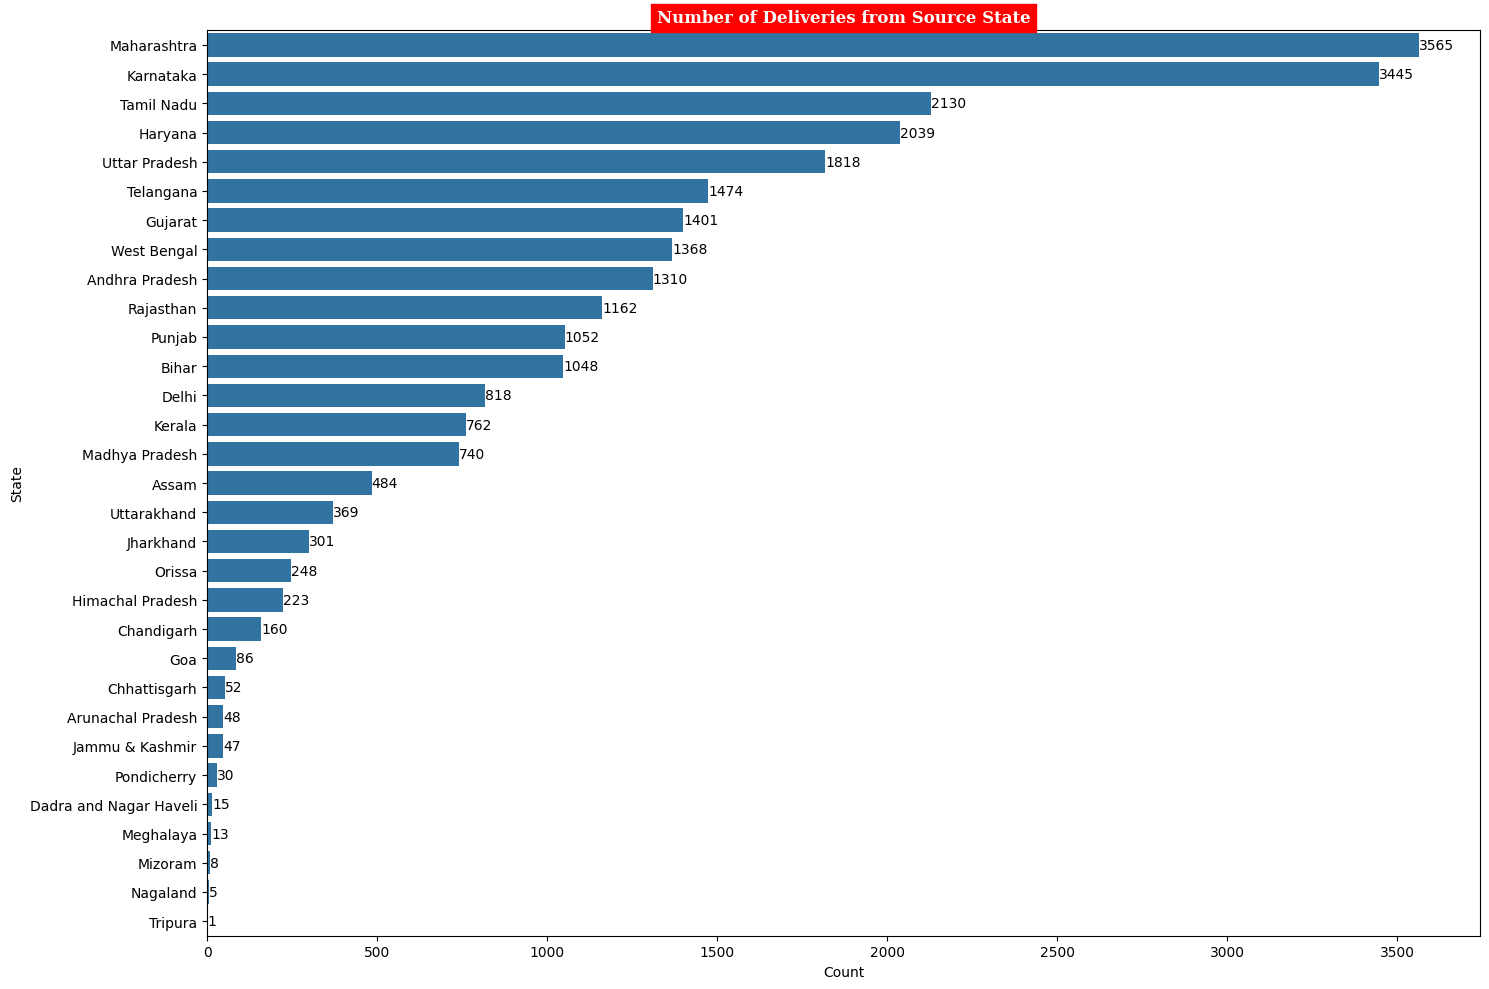

In [ ]:
plt.figure(figsize=(15,10))
a=sns.barplot(x=de['source_state'].value_counts().values,y=de['source_state'].value_counts().index)
a.bar_label(a.containers[0], label_type='edge')
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source State',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.tight_layout()
plt.show()

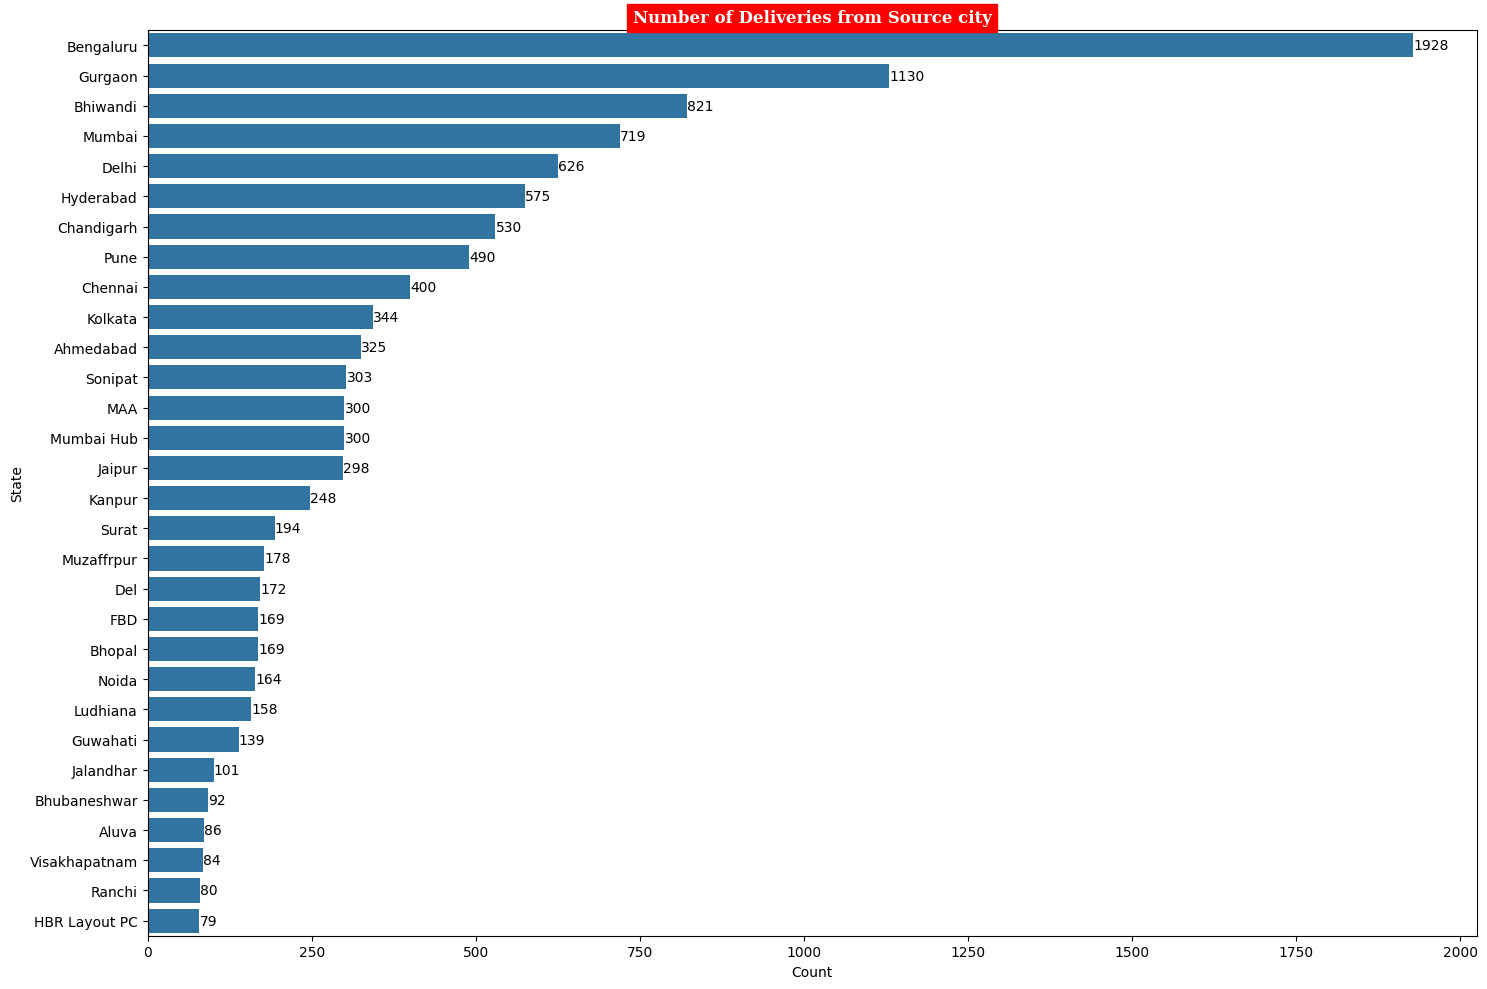

In [ ]:
plt.figure(figsize=(15,10))
a=sns.barplot(x=de['source_city'].value_counts().values[:30],y=de['source_city'].value_counts().index[:30])
a.bar_label(a.containers[0], label_type='edge')
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source city',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.tight_layout()
plt.show()

**Insights:**

- **Maharashtra**, **Karnataka** ,**Tamil Nadu**, **Haryana**, and **Uttar Pradesh** are the top contributors where maximum bookings are recorded in this month indicating significant engagement.

- Cities like **Bengaluru**, **Gurgaon**, **Mumbai**, **Bhiwandi**, **Delhi**, **Hyderabad** where the major no.of booking are recorded.

In [ ]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   segment_key                     26222 non-null  object         
 1   trip_uuid                       26222 non-null  object         
 2   data                            26222 non-null  category       
 3   route_type                      26222 non-null  category       
 4   trip_creation_time              26222 non-null  datetime64[ns] 
 5   source_name                     26222 non-null  object         
 6   destination_name                26222 non-null  object         
 7   od_start_time                   26222 non-null  datetime64[ns] 
 8   od_end_time                     26222 non-null  datetime64[ns] 
 9   start_scan_to_end_scan          26222 non-null  float64        
 10  actual_distance_to_destination  26222 non-null  float64   

In [ ]:
de['destination_state'].value_counts()

,count
destination_state,
Karnataka,3497
Maharashtra,3473
Tamil Nadu,2111
Haryana,2014
Uttar Pradesh,1828
Telangana,1539
Gujarat,1401
West Bengal,1399
Andhra Pradesh,1309


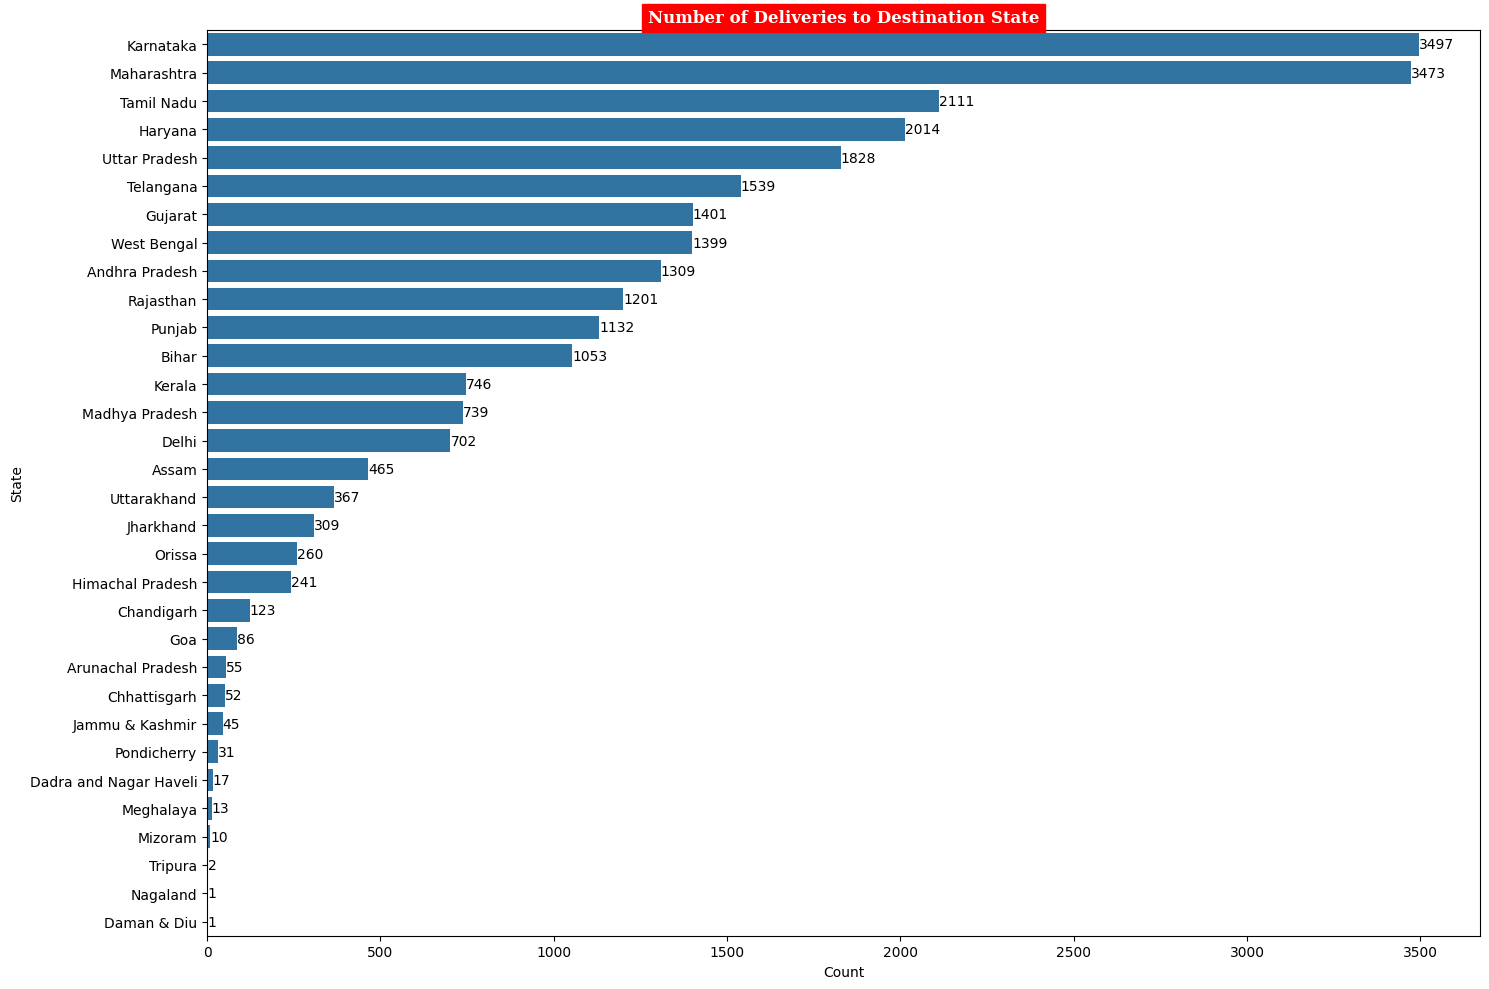

In [ ]:
plt.figure(figsize=(15,10))
a=sns.barplot(x=de['destination_state'].value_counts().values,y=de['destination_state'].value_counts().index)
a.bar_label(a.containers[0], label_type='edge')
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries to Destination State',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.tight_layout()
plt.show()

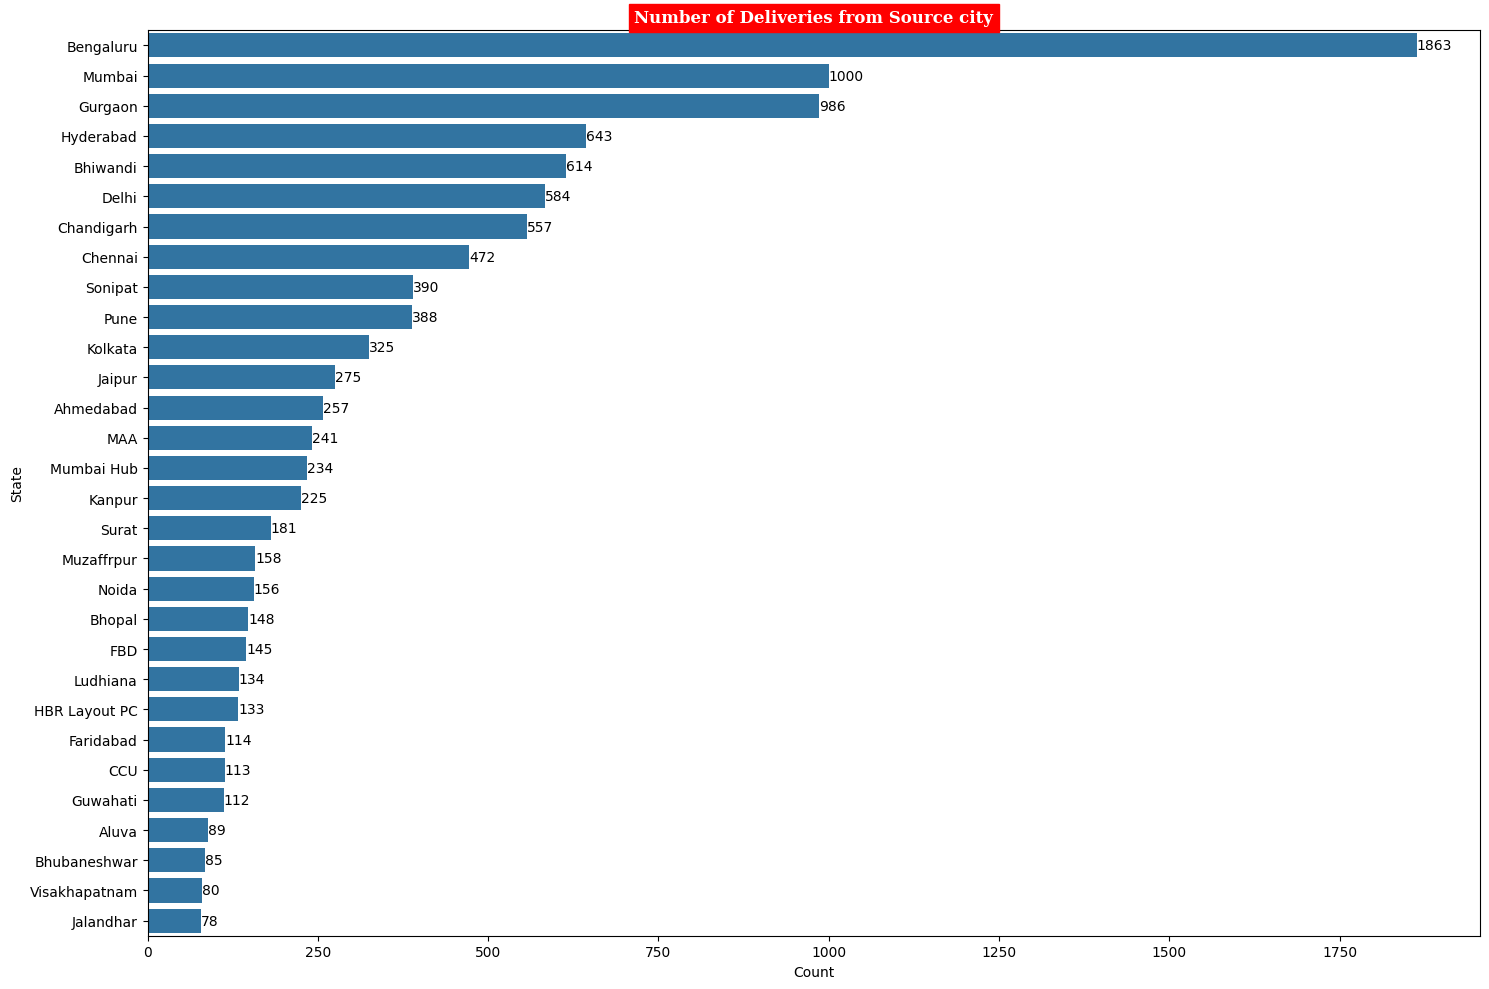

In [ ]:
plt.figure(figsize=(15,10))
a=sns.barplot(x=de['destination_city'].value_counts().values[:30],y=de['destination_city'].value_counts().index[:30])
a.bar_label(a.containers[0], label_type='edge')
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source city',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.tight_layout()
plt.show()

**Insights:**

- States like **Karnataka**, **Maharashtra**, **Tamil Nadu**, **Haryana**, and **Uttar Pradesh** where maximum packages are received in this month indicating significant engagement.

- Cities like **Bengaluru**, **Mumbai**, **Gurgaon**, **Bhiwandi**, **Hyderabad**, **Delhi** where the major no.of booking are received.

In [ ]:
de['corridor'] = de['source_name']+ '<---->' + de['destination_name']
de['corridor'].value_counts()

,count
corridor,
Bangalore_Nelmngla_H (Karnataka)<---->Bengaluru_KGAirprt_HB (Karnataka),151
Bangalore_Nelmngla_H (Karnataka)<---->Bengaluru_Bomsndra_HB (Karnataka),127
Bengaluru_Bomsndra_HB (Karnataka)<---->Bengaluru_KGAirprt_HB (Karnataka),121
Bengaluru_KGAirprt_HB (Karnataka)<---->Bangalore_Nelmngla_H (Karnataka),108
Pune_Tathawde_H (Maharashtra)<---->Bhiwandi_Mankoli_HB (Maharashtra),107
...,...
Ongole_SubhVRTL_I (Andhra Pradesh)<---->Kandukur_LICOffce_D (Andhra Pradesh),1
Madnapalle_PngnrRd_D (Andhra Pradesh)<---->Palamaner_Lakshmi_D (Andhra Pradesh),1
Dharmavram_SaiNgr_D (Andhra Pradesh)<---->Kadiri_GVManu_D (Andhra Pradesh),1


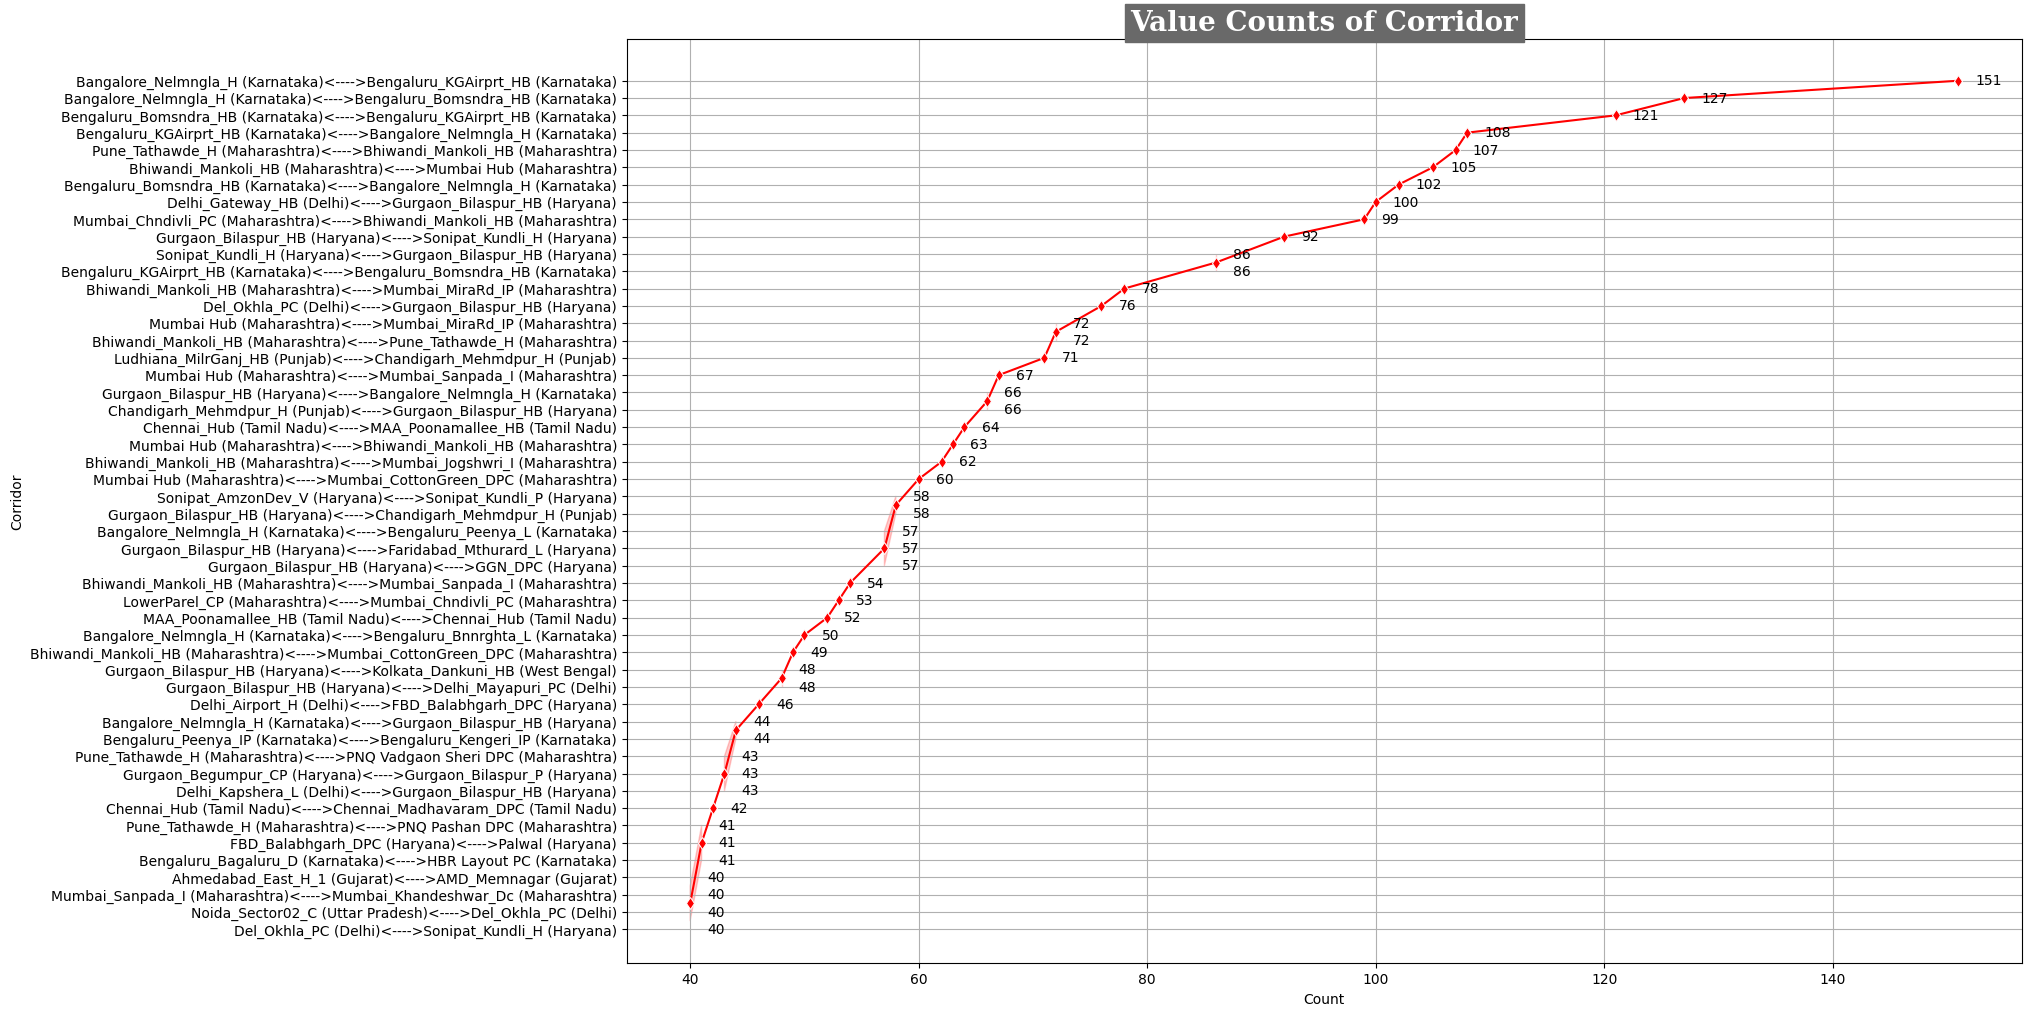

In [ ]:
counts= de['corridor'].value_counts()[:50]

plt.figure(figsize=(18,12))
sns.lineplot(y=counts.index, x=counts.values, marker='d', color='r')
plt.title('Value Counts of Corridor',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='dimgrey',color='w')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.grid(True)

for i, count in enumerate(counts.values):
    plt.text(count+1.5, counts.index[i], str(count), ha='left', va='center')

plt.show()

**Insights:**

- The route between **Bangalore_Nelamangala_H** to **Bengaluru_KGAirport_HB**,**Bengaluru_Bomsndra_HB** sees the highest package volume, with 151 and 127 packages sent respectively.
- **Bengaluru_Bommasandra_HB** to **Bengaluru_KGAirport_HB** is also popular, with 121 packages sent.
- **Bengaluru_KGAirport_HB** to **Bangalore_Nelamangala_H** has moderate activity, with 108 packages sent.
- The data indicates Bengaluru's importance as a transportation hub `Corridor` within ***Karnataka***, handling significant package traffic.

In [ ]:
de['state_corridor'] = de['source_state']+'--'+de['source_city'] +' <---> '+ de['destination_state']+'--'+de['destination_city']
de['state_corridor'].value_counts()

,count
state_corridor,
Karnataka--Bengaluru <---> Karnataka--Bengaluru,1413
Maharashtra--Bhiwandi <---> Maharashtra--Mumbai,407
Telangana--Hyderabad <---> Telangana--Hyderabad,316
Maharashtra--Mumbai <---> Maharashtra--Mumbai,286
Maharashtra--Mumbai <---> Maharashtra--Bhiwandi,282
...,...
Maharashtra--Dhule <---> Maharashtra--Jalgaon,1
Maharashtra--Amalner <---> Maharashtra--Erandol,1
Maharashtra--Erandol <---> Maharashtra--Pachora,1


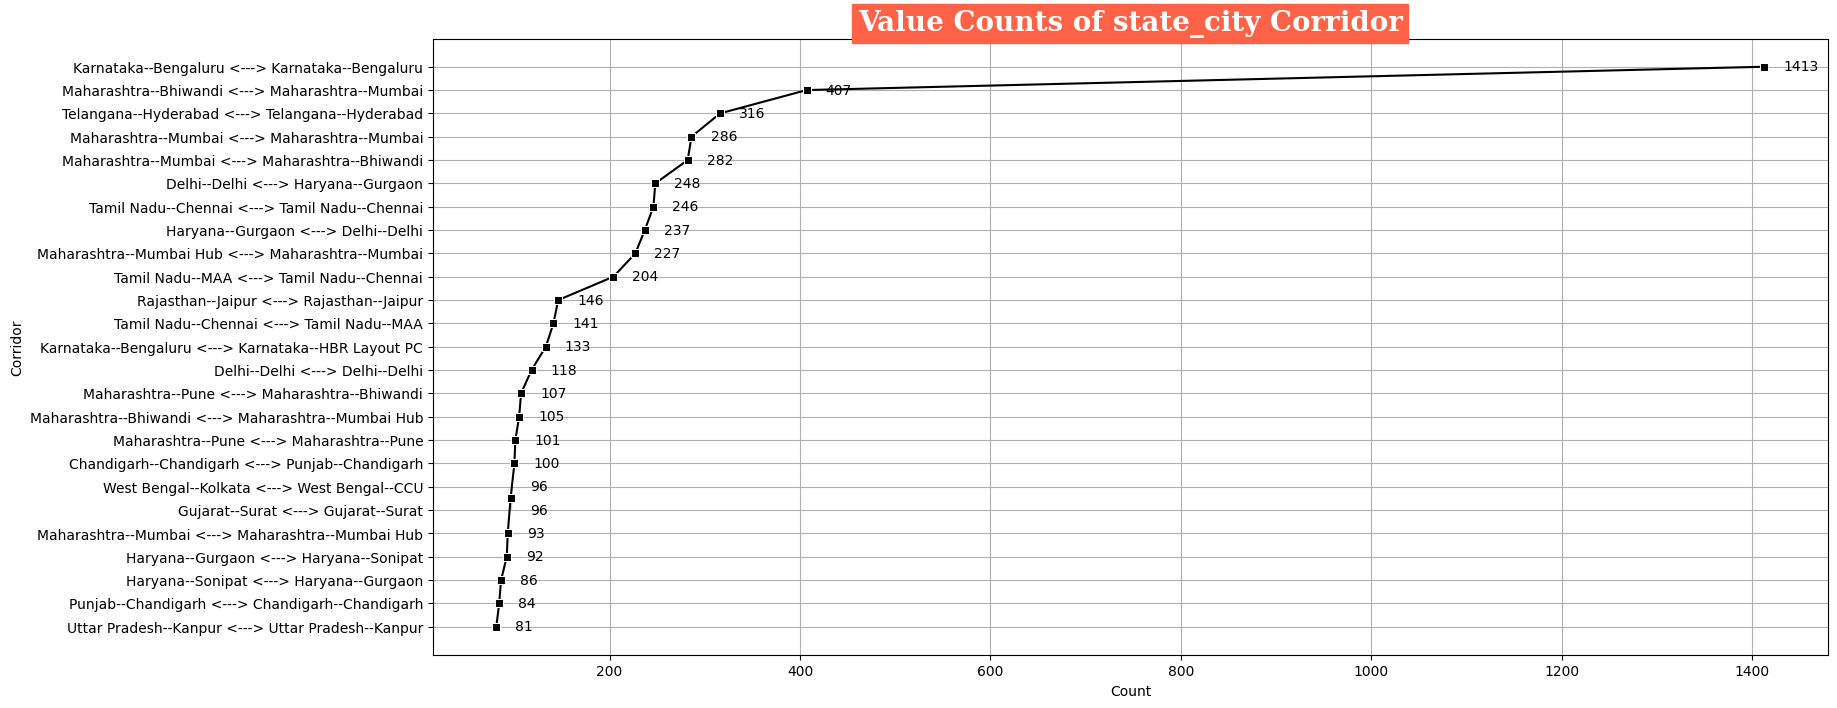

In [ ]:
state_counts = de['state_corridor'].value_counts()[:25]

plt.figure(figsize=(18,8))
sns.lineplot(y=state_counts.index, x=state_counts.values, marker='s', color='k')
plt.title('Value Counts of state_city Corridor',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='tomato',color='w')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.grid(True)

for i, count in enumerate(state_counts.values):
    plt.text(count+20, state_counts.index[i], str(count), ha='left', va='center')

plt.show()

In [ ]:
de['city_corridor'] = de['source_city']+'--'+de['source_place'] +' <---> '+ de['destination_city']+'--'+de['destination_place']
display(de['city_corridor'].value_counts())

,count
city_corridor,
Bengaluru--Nelmngla_H <---> Bengaluru--KGAirprt_HB,151
Bengaluru--Nelmngla_H <---> Bengaluru--Bomsndra_HB,127
Bengaluru--Bomsndra_HB <---> Bengaluru--KGAirprt_HB,121
Bengaluru--KGAirprt_HB <---> Bengaluru--Nelmngla_H,108
Pune--Tathawde_H <---> Bhiwandi--Mankoli_HB,107
...,...
Ongole--SubhVRTL_I <---> Kandukur--LICOffce_D,1
Madnapalle--PngnrRd_D <---> Palamaner--Lakshmi_D,1
Dharmavram--SaiNgr_D <---> Kadiri--GVManu_D,1


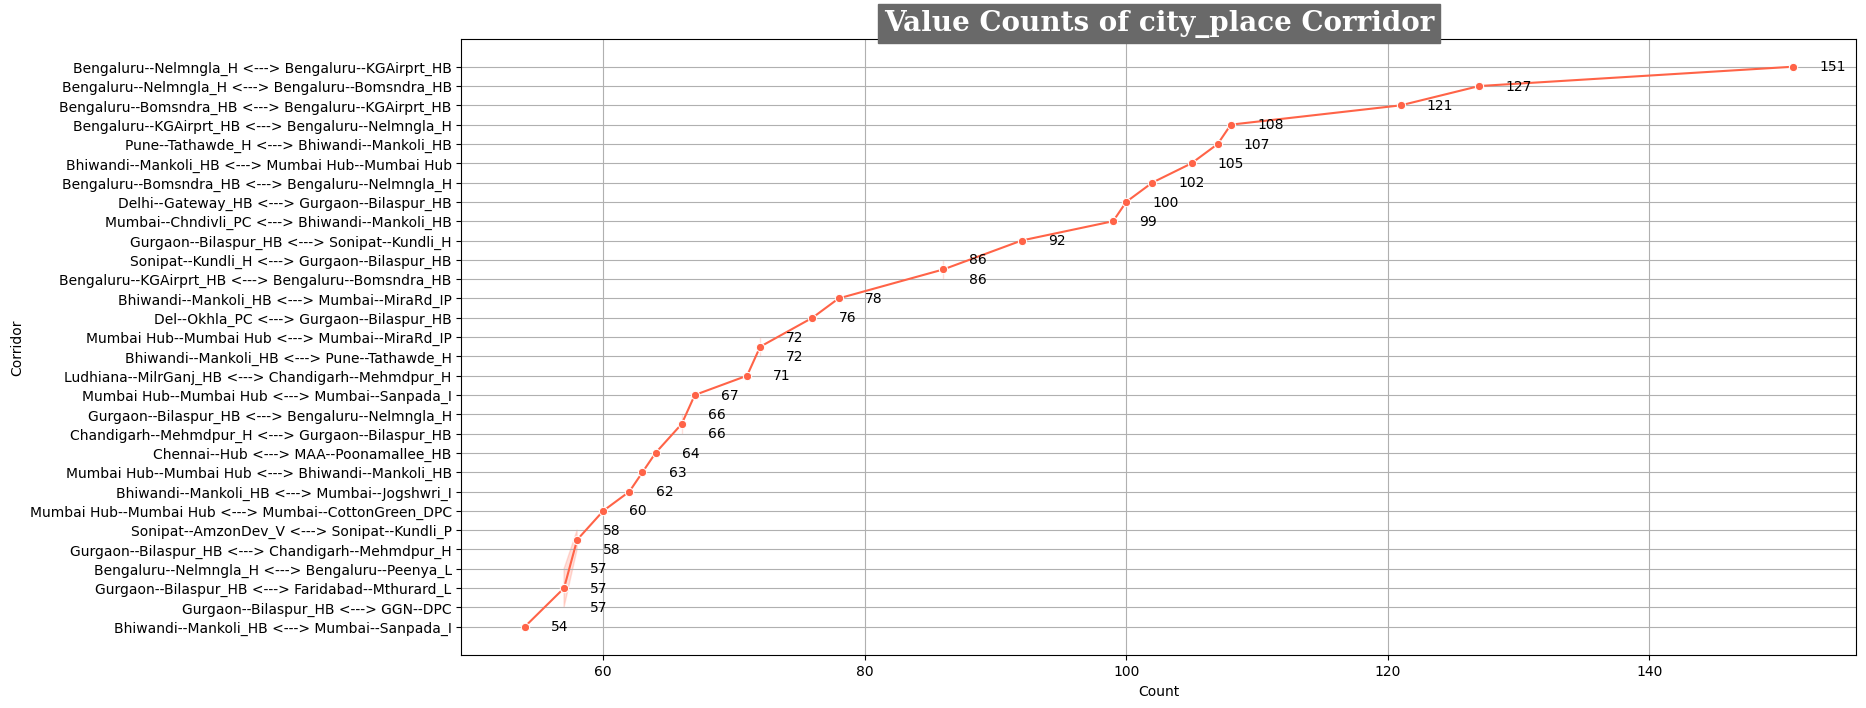

In [ ]:
city_counts = de['city_corridor'].value_counts()[:30]

plt.figure(figsize=(18,8))
sns.lineplot(y=city_counts.index, x=city_counts.values, marker='o', color='tomato')
plt.title('Value Counts of city_place Corridor',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='dimgray',color='w')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.grid(True)

for i, count in enumerate(city_counts.values):
    plt.text(count+2, city_counts.index[i], str(count), ha='left', va='center')

plt.show()

**Insights:**

-  Maharashtra, Karnataka, Haryana, and Tamil Nadu serve as key starting and ending locations for delivery services.
-  Mumbai, Gurgaon, Delhi, and Bengaluru are major metropolitan centers from where many deliveries originate.
-  A large proportion of nationwide deliveries are destined for Mumbai, Bengaluru, Gurgaon, and Delhi.


In [ ]:
# 4. Extracting features like month, year, day, etc. from Trip_creation_time
de['trip_creation_month'] = de['trip_creation_time'].dt.month
de['trip_creation_year'] = de['trip_creation_time'].dt.year
de['trip_creation_day'] = de['trip_creation_time'].dt.day
de['trip_creation_hour'] = de['trip_creation_time'].dt.hour
de['trip_creation_weekday'] = de['trip_creation_time'].dt.weekday
de['trip_creation_week'] = de['trip_creation_time'].dt.isocalendar().week
de

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,destination_state,corridor,state_corridor,city_corridor,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,...,Haryana,Kanpur_Central_H_6 (Uttar Pradesh)<---->Gurgao...,Uttar Pradesh--Kanpur <---> Haryana--Gurgaon,Kanpur--Central_H_6 <---> Gurgaon--Bilaspur_HB,9,2018,12,0,2,37
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,...,Uttar Pradesh,Bhopal_Trnsport_H (Madhya Pradesh)<---->Kanpur...,Madhya Pradesh--Bhopal <---> Uttar Pradesh--Ka...,Bhopal--Trnsport_H <---> Kanpur--Central_H_6,9,2018,12,0,2,37
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,...,Karnataka,Doddablpur_ChikaDPP_D (Karnataka)<---->Chikbla...,Karnataka--Doddablpur <---> Karnataka--Chikblapur,Doddablpur--ChikaDPP_D <---> Chikblapur--Shnti...,9,2018,12,0,2,37
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,...,Karnataka,Tumkur_Veersagr_I (Karnataka)<---->Doddablpur_...,Karnataka--Tumkur <---> Karnataka--Doddablpur,Tumkur--Veersagr_I <---> Doddablpur--ChikaDPP_D,9,2018,12,0,2,37
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,...,Punjab,Gurgaon_Bilaspur_HB (Haryana)<---->Chandigarh_...,Haryana--Gurgaon <---> Punjab--Chandigarh,Gurgaon--Bilaspur_HB <---> Chandigarh--Mehmdpur_H,9,2018,12,0,2,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069+IND628204AAA+IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,...,Tamil Nadu,Tirchchndr_Shnmgprm_D (Tamil Nadu)<---->Thisay...,Tamil Nadu--Tirchchndr <---> Tamil Nadu--Thisa...,Tirchchndr--Shnmgprm_D <---> Thisayanvilai--Ud...,10,2018,3,23,2,40
26218,trip-153861115439069069+IND628613AAA+IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,...,Tamil Nadu,Peikulam_SriVnktpm_D (Tamil Nadu)<---->Tirunel...,Tamil Nadu--Peikulam <---> Tamil Nadu--Tirunel...,Peikulam--SriVnktpm_D <---> Tirunelveli--Vdkku...,10,2018,3,23,2,40
26219,trip-153861115439069069+IND628801AAA+IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,...,Tamil Nadu,Eral_Busstand_D (Tamil Nadu)<---->Tirchchndr_S...,Tamil Nadu--Eral <---> Tamil Nadu--Tirchchndr,Eral--Busstand_D <---> Tirchchndr--Shnmgprm_D,10,2018,3,23,2,40
26220,trip-153861118270144424+IND583119AAA+IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.16694

## **In-depth Analysis and Feature Engineering**

In [ ]:
df_1 = de.copy()

In [ ]:
df_1.columns

Index(['segment_key', 'trip_uuid', 'data', 'route_type', 'trip_creation_time',
       'source_name', 'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum', 'od_total_time',
       'od_time_diff_hour', 'source_city', 'source_place', 'source_state',
       'destination_city', 'destination_place', 'destination_state',
       'corridor', 'state_corridor', 'city_corridor', 'trip_creation_month',
       'trip_creation_year', 'trip_creation_day', 'trip_creation_hour',
       'trip_creation_weekday', 'trip_creation_week'],
      dtype='object')

In [ ]:
create_trip_dict={
  'data' : 'first',
  'route_type' : 'first',
  'od_start_time':'first',
  'od_end_time':'last',
  'od_time_diff_hour' : 'sum',
  'trip_creation_time' : 'first',
  'trip_creation_month' : 'first',
  'trip_creation_year' : 'first',
  'trip_creation_day' : 'first',
  'trip_creation_hour' : 'first',
  'trip_creation_weekday' : 'first',
  'trip_creation_week' : 'first',
  'start_scan_to_end_scan' : 'sum',
  'actual_distance_to_destination' : 'sum',
  'actual_time' : 'sum',
  'osrm_time' : 'sum',
  'osrm_distance' : 'sum',
  'segment_actual_time': 'sum',
  'segment_osrm_time': 'sum',
  'segment_osrm_distance': 'sum',
  'segment_actual_time_sum': 'sum',
  'segment_osrm_time_sum': 'sum',
  'segment_osrm_distance_sum': 'sum',
  'source_name': 'first',
  'source_city':'first',
  'source_state':'first',
  'source_place':'first',
  'destination_name': 'first',
  'destination_city':'first',
  'destination_state':'first',
  'destination_place':'first',
  'corridor':'first',
  'state_corridor':'first',
  'city_corridor':'first'
  }

trip_agg_df = df_1.groupby('trip_uuid').agg(create_trip_dict).reset_index()
trip_agg_df

,trip_uuid,data,route_type,od_start_time,od_end_time,od_time_diff_hour,trip_creation_time,trip_creation_month,trip_creation_year,trip_creation_day,...,source_city,source_state,source_place,destination_name,destination_city,destination_state,destination_place,corridor,state_corridor,city_corridor
0,trip-153671041653548748,training,FTL,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,37.668497,2018-09-12 00:00:16.535741,9,2018,12,...,Kanpur,Uttar Pradesh,Central_H_6,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Haryana,Bilaspur_HB,Kanpur_Central_H_6 (Uttar Pradesh)<---->Gurgao...,Uttar Pradesh--Kanpur <---> Haryana--Gurgaon,Kanpur--Central_H_6 <---> Gurgaon--Bilaspur_HB
1,trip-153671042288605164,training,Carting,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,3.026865,2018-09-12 00:00:22.886430,9,2018,12,...,Doddablpur,Karnataka,ChikaDPP_D,Chikblapur_ShntiSgr_D (Karnataka),Chikblapur,Karnataka,ShntiSgr_D,Doddablpur_ChikaDPP_D (Karnataka)<---->Chikbla...,Karnataka--Doddablpur <---> Karnataka--Chikblapur,Doddablpur--ChikaDPP_D <---> Chikblapur--Shnti...
2,trip-153671043369099517,training,FTL,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,65.572709,2018-09-12 00:00:33.691250,9,2018,12,...,Gurgaon,Haryana,Bilaspur_HB,Chandigarh_Mehmdpur_H (Punjab),Chandigarh,Punjab,Mehmdpur_H,Gurgaon_Bilaspur_HB (Haryana)<---->Chandigarh_...,Haryana--Gurgaon <---> Punjab--Chandigarh,Gurgaon--Bilaspur_HB <---> Chandigarh--Mehmdpur_H
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1.674916,2018-09-12 00:01:00.113710,9,2018,12,...,Mumbai Hub,Maharashtra,Mumbai Hub,Mumbai_MiraRd_IP (Maharashtra),Mumbai,Maharashtra,MiraRd_IP,Mumbai Hub (Maharashtra)<---->Mumbai_MiraRd_IP...,Maharashtra--Mumbai Hub <---> Maharashtra--Mumbai,Mumbai Hub--Mumbai Hub <---> Mumbai--MiraRd_IP
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,11.972484,2018-09-12 00:02:09.740725,9,2018,12,...,Bellary,Karnataka,Dc,Hospet (Karnataka),Hospet,Karnataka,Hospet,Bellary_Dc (Karnataka)<---->Hospet (Karnataka),Karnataka--Bellary <---> Karnataka--Hospet,Bellary--Dc <---> Hospet--Hospet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,Carting,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,4.300482,2018-10-03 23:55:56.258533,10,2018,3,...,Chandigarh,Punjab,Mehmdpur_H,Zirakpur_DC (Punjab),Zirakpur,Punjab,DC,Chandigarh_Mehmdpur_H (Punjab)<---->Zirakpur_D...,Punjab--Chandigarh <---> Punjab--Zirakpur,Chandigarh--Mehmdpur_H <---> Zirakpur--DC
14783,trip-153861104386292051,test,Carting,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,1.009842,2018-10-03 23:57:23.863155,10,2018,3,...,FBD,Haryana,Balabhgarh_DPC,Faridabad_Blbgarh_DC (Haryana),Faridabad,Haryana,Blbgarh_DC,FBD_Balabhgarh_DPC (Haryana)<---->Faridabad_Bl...,Haryana--FBD <---> Haryana--Faridabad,FBD--Balabhgarh_DPC <---> Faridabad--Blbgarh_DC
14784,trip-153861106442901555,test,Carting,2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,7.035331,2018-10-03 23:57:44.429324,10,2018,3,...,Kanpur,Uttar Pradesh,GovndNgr_DC,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Uttar Pradesh,Central_H_6,Kanpur_GovndNgr_DC (Uttar Pradesh)<---->Kanpur...,Uttar Pradesh--Kanpur <---> Uttar Pradesh--Kanpur,Kanpur--GovndNgr_DC <---> Kanpur--Central_H_6
14785,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,5.808548,2018-10-03 23:59:14.390954,10,2018,3,...,Tirunelveli,Tamil Nadu,VdkkuSrt_I,Eral_Busstand_D (Tamil Nadu),Eral,Tamil Nadu,Busstand_D,Tirunelveli_VdkkuSrt_I (Tamil Nadu)<---->Eral_...,Tamil Nadu--Tirunelveli <---> Tamil Nadu--Eral,Tirunelveli--VdkkuSrt_I <---> Eral--Busstand_D


In [ ]:
numerical_columns = trip_agg_df.select_dtypes(include=[np.float64])
numerical_columns

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,37.668497,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,1548.0,1008.0,1320.4733
1,3.026865,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,141.0,65.0,84.1894
2,65.572709,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,3308.0,1941.0,2545.2678
3,1.674916,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,59.0,16.0,19.8766
4,11.972484,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,4.300482,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,82.0,62.0,64.8551
14783,1.009842,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,21.0,11.0,16.0883
14784,7.035331,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,281.0,88.0,104.8866
14785,5.808548,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,258.0,221.0,223.5324


In [ ]:
numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
od_time_diff_hour,14787.0,8.840187,10.978880,0.391024,2.494975,4.661846,10.558962,131.642533
start_scan_to_end_scan,14787.0,529.429025,658.254936,23.000000,149.000000,279.000000,632.000000,7898.000000
actual_distance_to_destination,14787.0,164.090196,305.502982,9.002461,22.777099,48.287894,163.591258,2186.531787
actual_time,14787.0,356.306012,561.517936,9.000000,67.000000,148.000000,367.000000,6265.000000
osrm_time,14787.0,160.990938,271.459495,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14787.0,203.887411,370.565564,9.072900,30.756900,65.302800,206.644200,2840.081000
segment_actual_time,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000
segment_osrm_distance,14787.0,222.705466,416.846279,9.072900,32.578850,69.784200,216.560600,3523.632400
segment_actual_time_sum,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000


In [ ]:
trip_agg_df.describe(include = object).T

,count,unique,top,freq
trip_uuid,14787,14787,trip-153671041653548748,1
source_name,14787,930,Gurgaon_Bilaspur_HB (Haryana),1052
source_city,14787,719,Bengaluru,1700
source_state,14787,29,Maharashtra,2714
source_place,14787,789,Bilaspur_HB,1052
destination_name,14787,1042,Gurgaon_Bilaspur_HB (Haryana),745
destination_city,14787,857,Bengaluru,1633
destination_state,14787,32,Maharashtra,2569
destination_place,14787,868,Bilaspur_HB,745
corridor,14787,1737,Bangalore_Nelmngla_H (Karnataka)<---->Bengalur...,151


In [ ]:
trip_df= trip_agg_df.copy()

In [ ]:
trip_df['trip_creation_year'].value_counts()

,count
trip_creation_year,
2018,14787


In [ ]:
trip_df['trip_creation_month'].value_counts()

,count
trip_creation_month,
9,13011
10,1776


In [ ]:
trip_df['trip_creation_day'].value_counts()

,count
trip_creation_day,
18,791
15,783
13,750
12,747
21,740
22,740
17,722
14,712
20,703


### **Hypothesis Testing:**

**Comparision Between od_time_diff_hour and start_scan_to_end_scan.**

Test between od_time_diff_hour and start_scan_to_end_scan

H0: Both Variables are not correlated

Ha: Both variables are correlated

In [ ]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  category      
 2   route_type                      14787 non-null  category      
 3   od_start_time                   14787 non-null  datetime64[ns]
 4   od_end_time                     14787 non-null  datetime64[ns]
 5   od_time_diff_hour               14787 non-null  float64       
 6   trip_creation_time              14787 non-null  datetime64[ns]
 7   trip_creation_month             14787 non-null  int32         
 8   trip_creation_year              14787 non-null  int32         
 9   trip_creation_day               14787 non-null  int32         
 10  trip_creation_hour              14787 non-null  int32         
 11  tr

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
import scipy.stats as stats

In [ ]:
test_statistics,p_value = stats.pearsonr(trip_df['od_time_diff_hour'],trip_df['start_scan_to_end_scan'])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Both Variables are correlated")
else:
    print("Fail to Reject Null Hypothesis,Both Variables are not correlated")

0.0
Reject Null Hypotheis, Both Variables are correlated


**Comparison between actual_time aggregated value and OSRM time aggregated value**

T-Test for actual_time and osrm_time

H0: Mean of actual_time and osrm_time are same (mu_1 = mu_2)

Ha: Mean of actual_time is higher than osrm_time (mu_1 > mu_2)

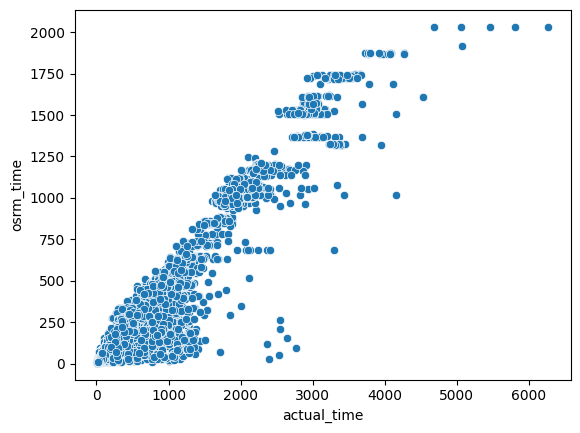

In [ ]:
#Visualization between distance and time
sns.scatterplot(x=trip_df["actual_time"],y=trip_df["osrm_time"])
plt.show()

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
test_statistics,p_value = ttest_ind(trip_df['actual_time'],trip_df['osrm_time'], alternative='greater')
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Mean of actual_time and osrm_time are same")
else:
    print("Fail to Reject Null Hypothesis,ean of actual_time is higher than osrm_time")

4.1073095671733e-310
Reject Null Hypotheis, Mean of actual_time and osrm_time are same


Pearson Test actual_time and osrm_time

H0: Both Variables are not correlated

Ha: Both variables are correlated

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05
test_statistics,p_value=stats.pearsonr(trip_df["actual_time"],trip_df["osrm_time"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Both Variables are correlated")
else:
    print("Fail to Reject Null Hypothesis,Both Variables are not correlated")

0.0
Reject Null Hypotheis, Both Variables are correlated


**Comparision between actual_time aggregated value and segment actual time aggregated value**

T-Test for actual_time and segment_actual_time

H0: Mean of actual_time and segment_actual_time are same (mu_1 = mu_2)

Ha: Mean of actual_time and segment_actual_time are not same (mu_1 != mu_2)

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05
test_statistics,p_value=ttest_ind(trip_df["actual_time"],trip_df["segment_actual_time"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Mean of actual_time and segment_actual_time are not same")
else:
    print("Fail to Reject Null Hypothesis,Mean of actual_time and segment_actual_time are same")

0.6174479719707524
Fail to Reject Null Hypothesis,Mean of actual_time and segment_actual_time are same


**Comparison between osrm time aggregated value and segment osrm time aggregated value**

T-Test for osrm_time and segment_osrm_time

H0: Mean of osrm_time and segment_osrm_time are same (mu_1 = mu_2)

Ha: Mean of osrm_time and segment_osrm_time are not same (mu_1 != mu_2)

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
test_statistics,p_value=ttest_ind(trip_df["osrm_time"],trip_df["segment_osrm_time"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Mean of osrm_time and segment_osrm_time are not same")
else:
    print("Fail to Reject Null Hypothesis,Mean of osrm_time and segment_osrm_time are same")

1.128703468644937e-08
Reject Null Hypotheis, Mean of osrm_time and segment_osrm_time are not same


**Comparison between osrm distance aggregated value and segment osrm distance aggregated value**

T-Test for osrm_distance and segment_osrm_distance

H0: Mean of osrm_distance and segment_osrm_distance are same (mu_1 = mu_2)

Ha: Mean of osrm_distance and segment_osrm_distance are not same (mu_1 != mu_2)

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
test_statistics,p_value=ttest_ind(trip_df["osrm_distance"],trip_df["segment_osrm_distance"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Mean of osrm_distance and segment_osrm_distance are not same")
else:
    print("Fail to Reject Null Hypothesis,Mean of osrm_distance and segment_osrm_distance are same")

4.0929578191203324e-05
Reject Null Hypotheis, Mean of osrm_distance and segment_osrm_distance are not same


### **Outliers Detection Using IQR Method**

In [ ]:
trip_df.describe()

,od_start_time,od_end_time,od_time_diff_hour,trip_creation_time,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,trip_creation_weekday,trip_creation_week,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
count,14787,14787,14787.000000,14787,14787.000000,14787.0,14787.000000,14787.000000,14787.000000,14787.0,...,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000
mean,2018-09-22 14:39:56.325738496,2018-09-22 20:49:39.860267008,8.840187,2018-09-22 12:26:28.269885696,9.120105,2018.0,18.375127,12.456212,2.920944,38.293907,...,164.090196,356.306012,160.990938,203.887411,353.059174,180.511598,222.705466,353.059174,180.511598,222.705466
min,2018-09-12 00:01:00.113710,2018-09-12 00:50:10.814399,0.391024,2018-09-12 00:00:16.535741,9.000000,2018.0,1.000000,0.000000,0.000000,37.0,...,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900
25%,2018-09-17 05:23:23.166219520,2018-09-17 11:01:12.272902912,2.494975,2018-09-17 02:38:18.128431872,9.000000,2018.0,14.000000,4.000000,1.000000,38.0,...,22.777099,67.000000,29.000000,30.756900,66.000000,30.000000,32.578850,66.000000,30.000000,32.578850
50%,2018-09-22 05:37:28.196830976,2018-09-22 12:46:03.655276032,4.661846,2018-09-22 03:39:19.609193984,9.000000,2018.0,19.000000,14.000000,3.000000,38.0,...,48.287894,148.000000,60.000000,65.302800,147.000000,65.000000,69.784200,147.000000,65.000000,69.784200
75%,2018-09-27 20:42:21.489692672,2018-09-28 02:23:08.496503040,10.558962,2018-09-27 19:23:14.074359552,9.000000,2018.0,25.000000,20.000000,5.000000,39.0,...,163.591258,367.000000,168.000000,206.644200,364.000000,184.000000,216.560600,364.000000,184.000000,216.560600
max,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,131.642533,2018-10-03 23:59:42.701692,10.000000,2018.0,30.000000,23.000000,6.000000,40.0,...,2186.531787,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400,6230.000000,2564.000000,3523.632400
std,NaN,NaN,10.978880,NaN,0.325096,0.0,7.882198,7.987387,1.927690,0.967366,...,305.502982,561.517936,271.459495,370.565564,556.365911,314.679279,416.846279,556.365911,314.679279,416.846279


In [ ]:
numerical_columns

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,37.668497,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,1548.0,1008.0,1320.4733
1,3.026865,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,141.0,65.0,84.1894
2,65.572709,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,3308.0,1941.0,2545.2678
3,1.674916,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,59.0,16.0,19.8766
4,11.972484,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,4.300482,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,82.0,62.0,64.8551
14783,1.009842,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,21.0,11.0,16.0883
14784,7.035331,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,281.0,88.0,104.8866
14785,5.808548,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,258.0,221.0,223.5324


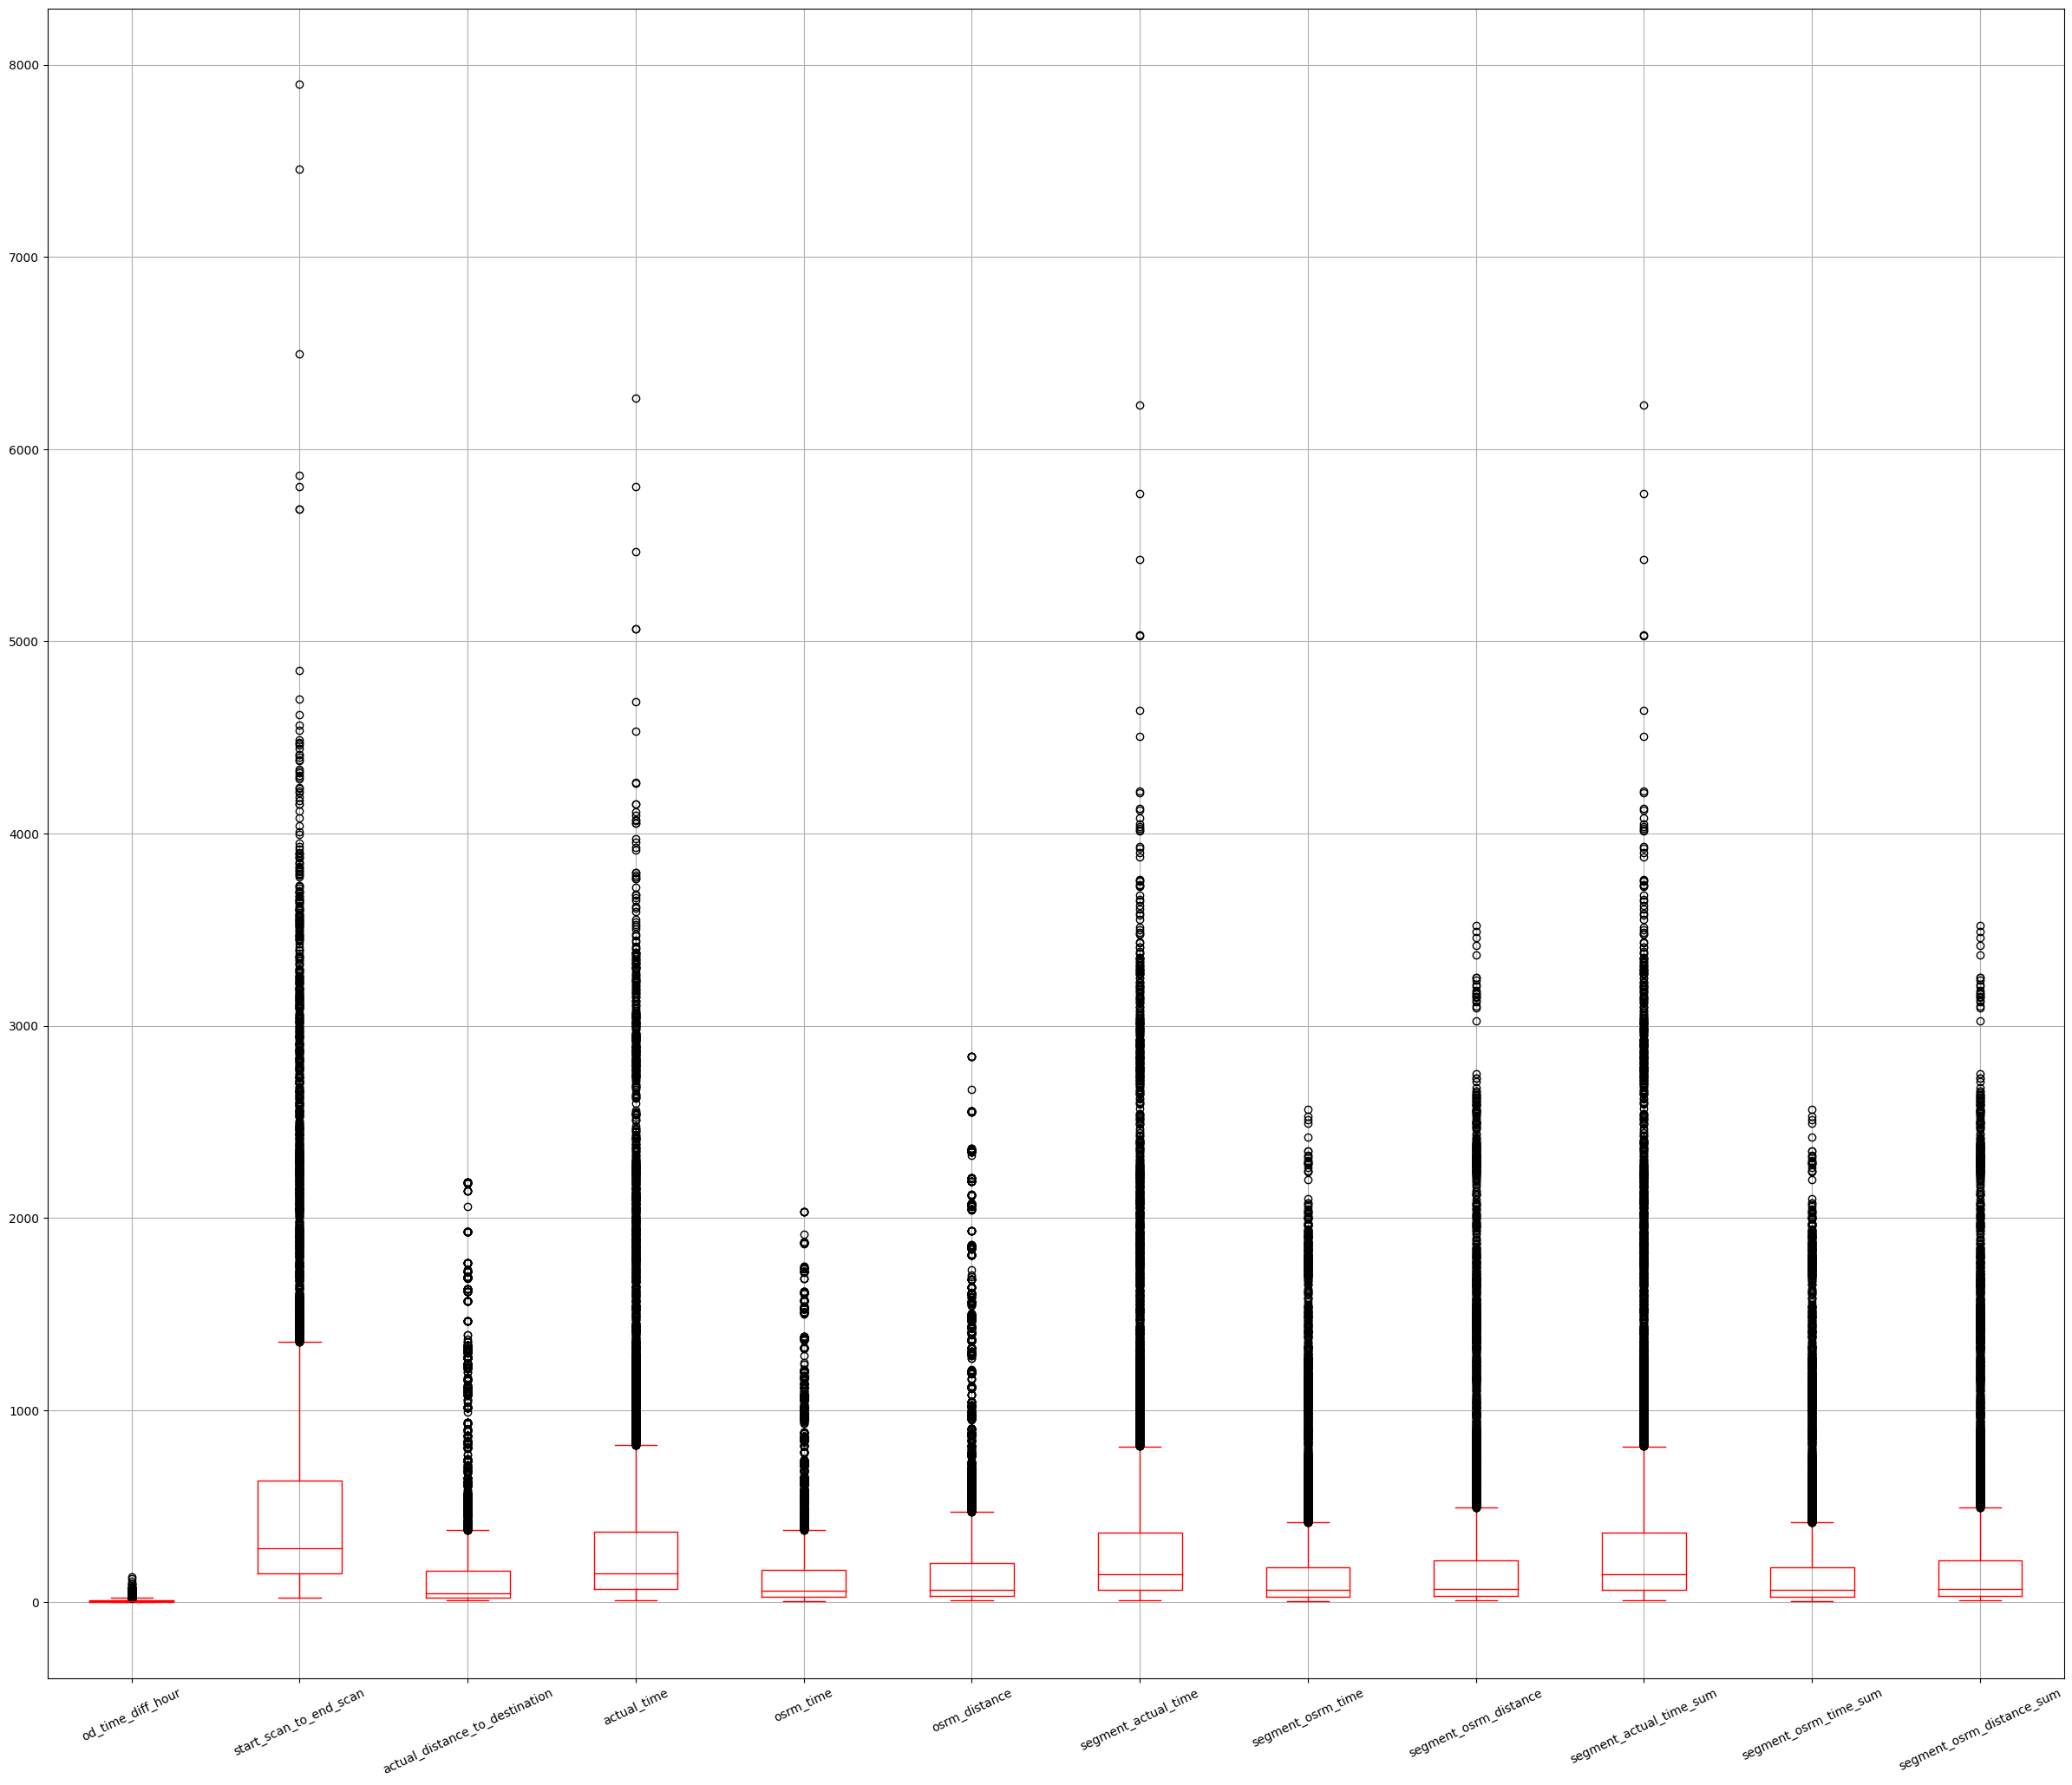

In [ ]:
plt.figure(figsize=(30, 25))
numerical_columns.boxplot(rot=25, figsize=(35,20), color = 'r')
plt.grid('off')
plt.show()

In [ ]:
num_cols=numerical_columns.columns.tolist()
num_cols

['od_time_diff_hour',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_actual_time_sum',
 'segment_osrm_time_sum',
 'segment_osrm_distance_sum']

In [ ]:
# obtain the first quartile
Q1 = numerical_columns.quantile(0.25)

# obtain the third quartile
Q3 = numerical_columns.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

od_time_diff_hour                   8.063987
start_scan_to_end_scan            483.000000
actual_distance_to_destination    140.814159
actual_time                       300.000000
osrm_time                         139.000000
osrm_distance                     175.887300
segment_actual_time               298.000000
segment_osrm_time                 154.000000
segment_osrm_distance             183.981750
segment_actual_time_sum           298.000000
segment_osrm_time_sum             154.000000
segment_osrm_distance_sum         183.981750
dtype: float64


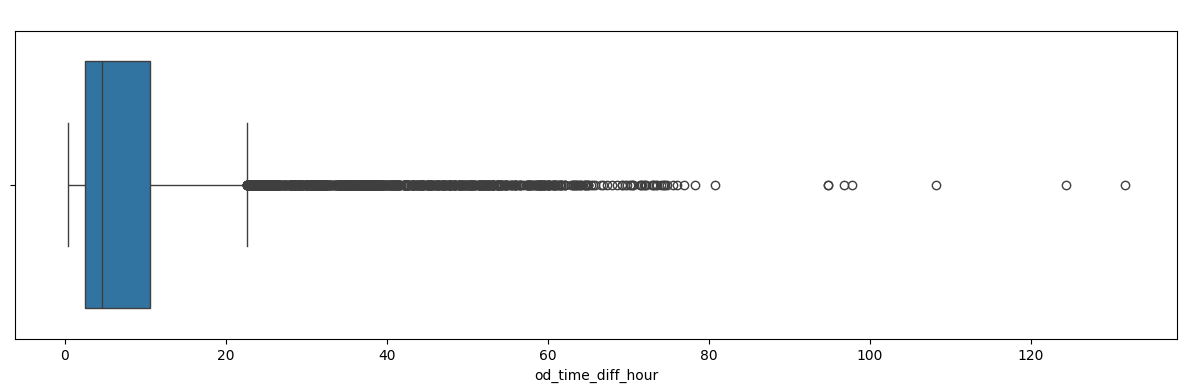

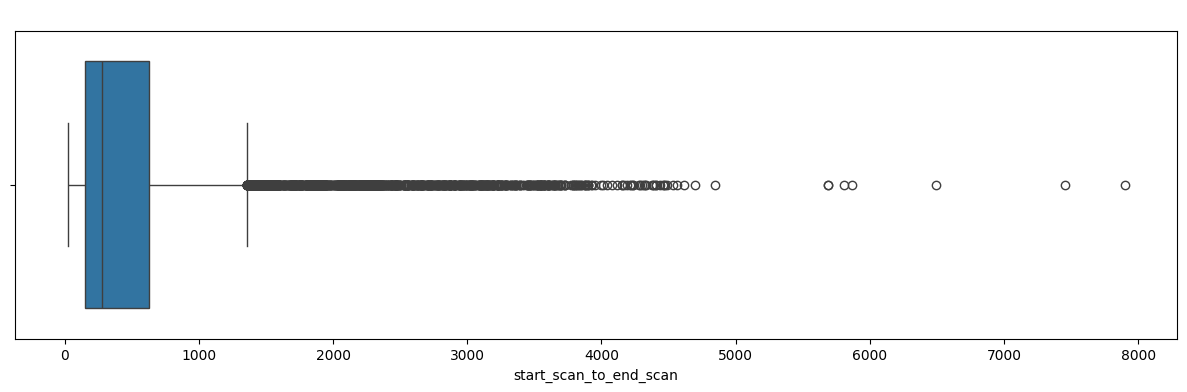

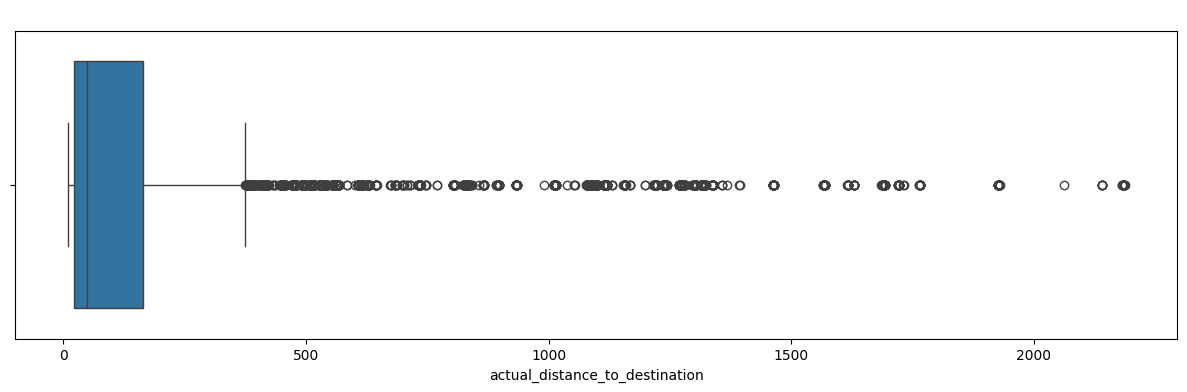

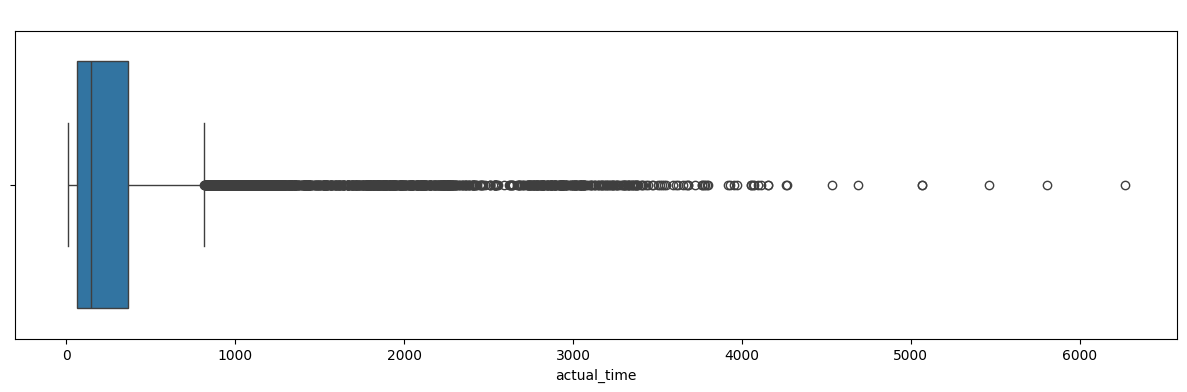

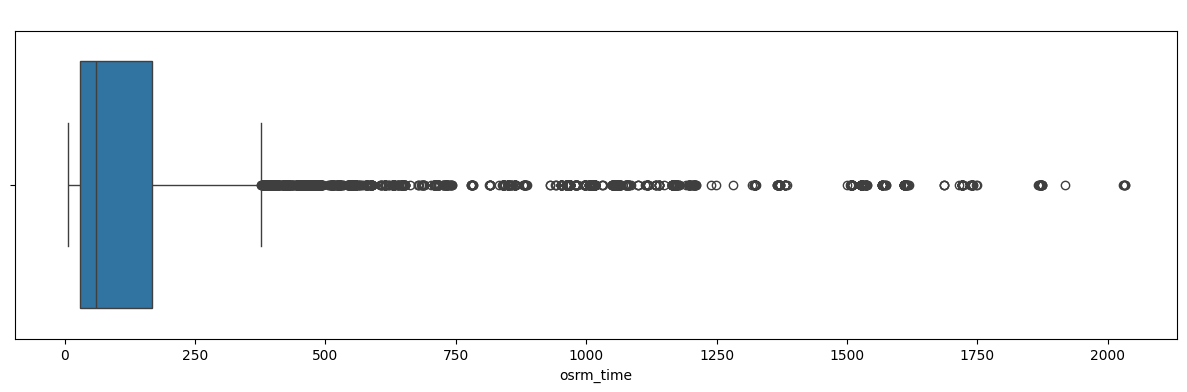

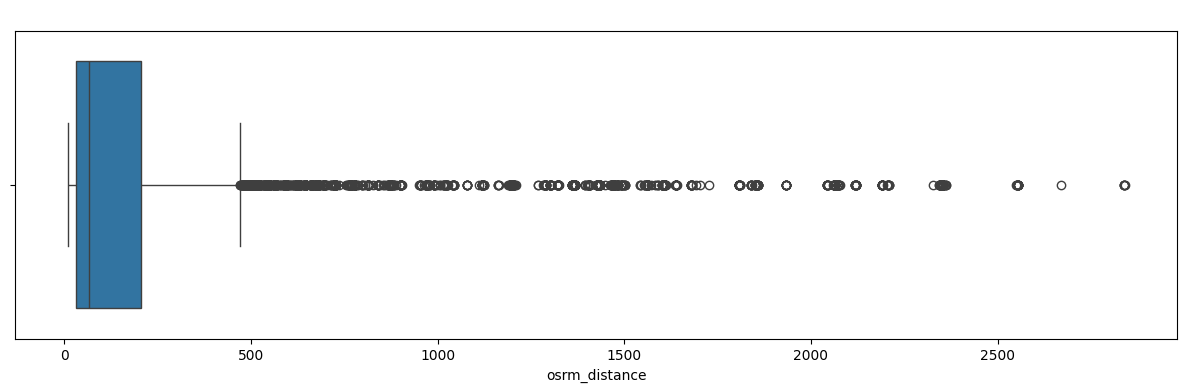

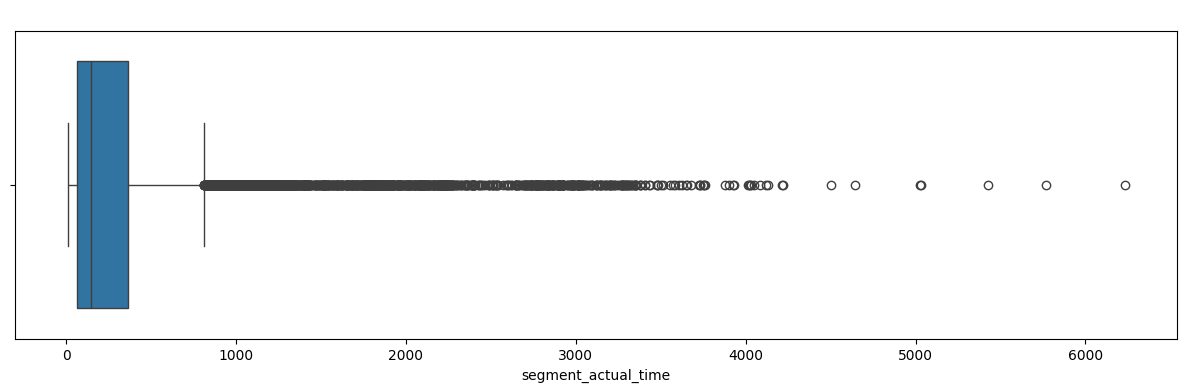

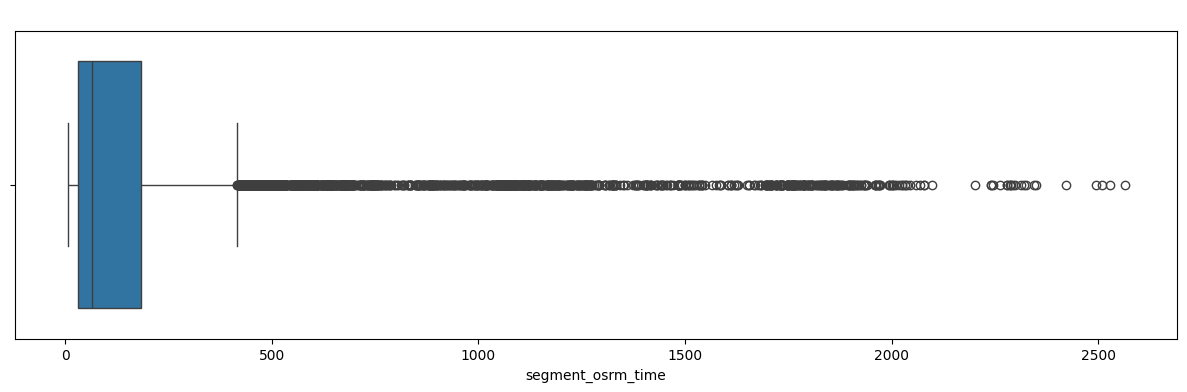

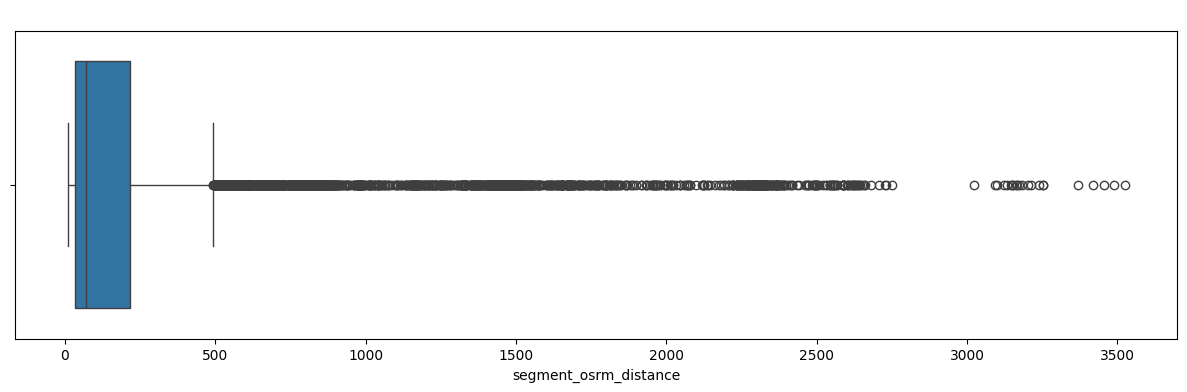

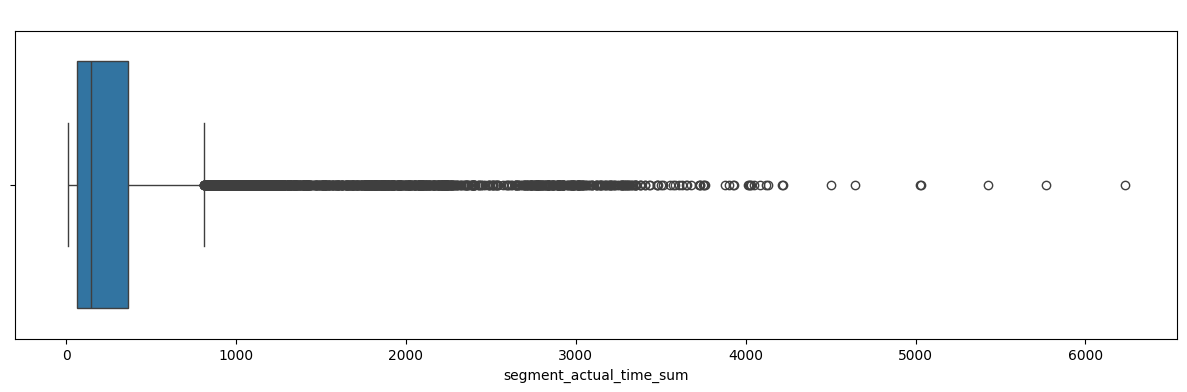

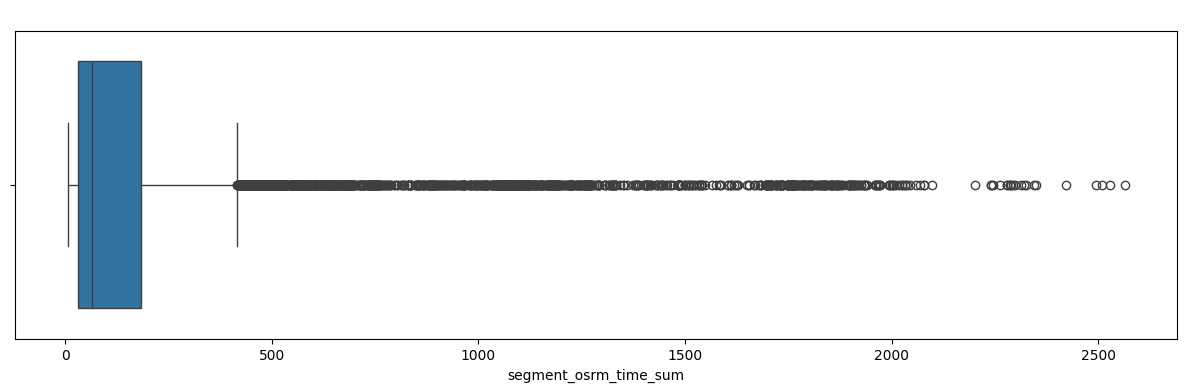

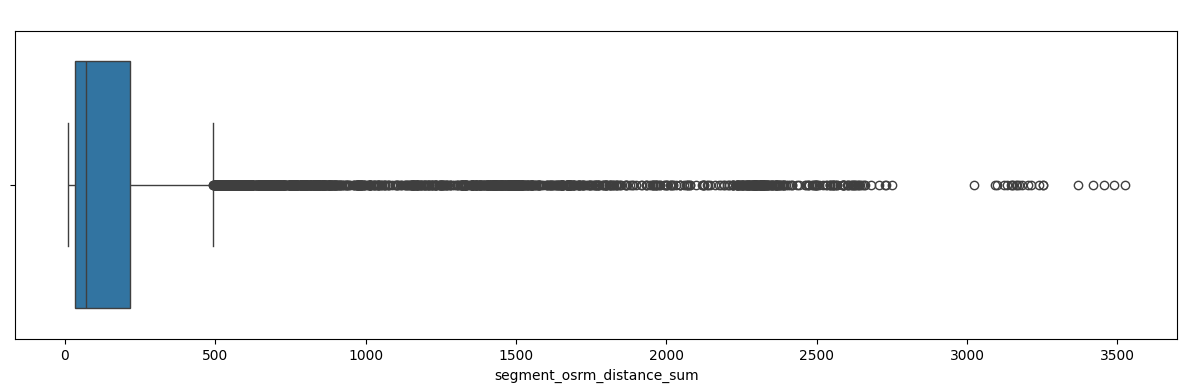

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(15,4))
    sns.boxplot(x=col, data=numerical_columns,)
    plt.title(f'Boxplot of {col}',fontfamily='serif',fontweight='bold',fontsize=12,color='w')
    plt.show()

**Outlier Removal:**

Clipped data of od_time_diff_hour


,od_time_diff_hour
0,22.654942
1,3.026865
2,22.654942
3,1.674916
4,11.972484
...,...
14782,4.300482
14783,1.009842
14784,7.035331
14785,5.808548



Filtered data of od_time_diff_hour


,od_time_diff_hour
0,37.668497
1,3.026865
2,65.572709
3,1.674916
4,11.972484
...,...
14782,4.300482
14783,1.009842
14784,7.035331
14785,5.808548


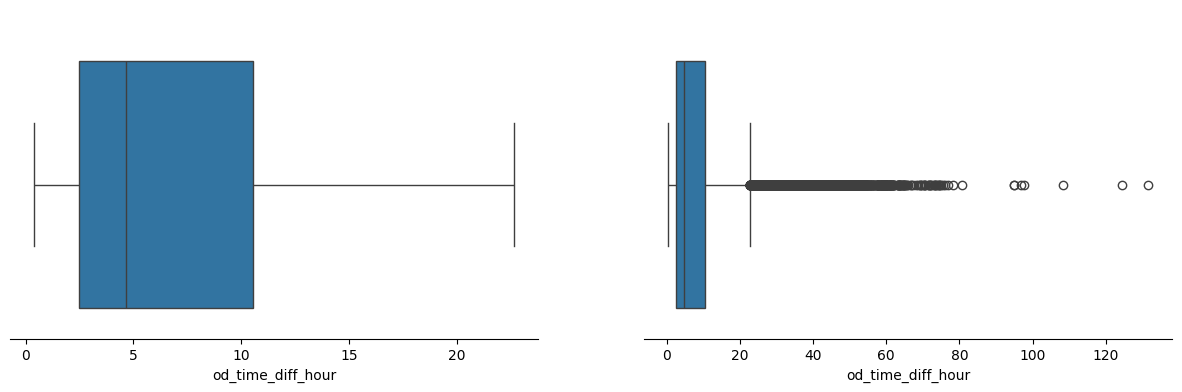

Clipped data of start_scan_to_end_scan


,start_scan_to_end_scan
0,1356.5
1,180.0
2,1356.5
3,100.0
4,717.0
...,...
14782,257.0
14783,60.0
14784,421.0
14785,347.0



Filtered data of start_scan_to_end_scan


,start_scan_to_end_scan
0,2259.0
1,180.0
2,3933.0
3,100.0
4,717.0
...,...
14782,257.0
14783,60.0
14784,421.0
14785,347.0


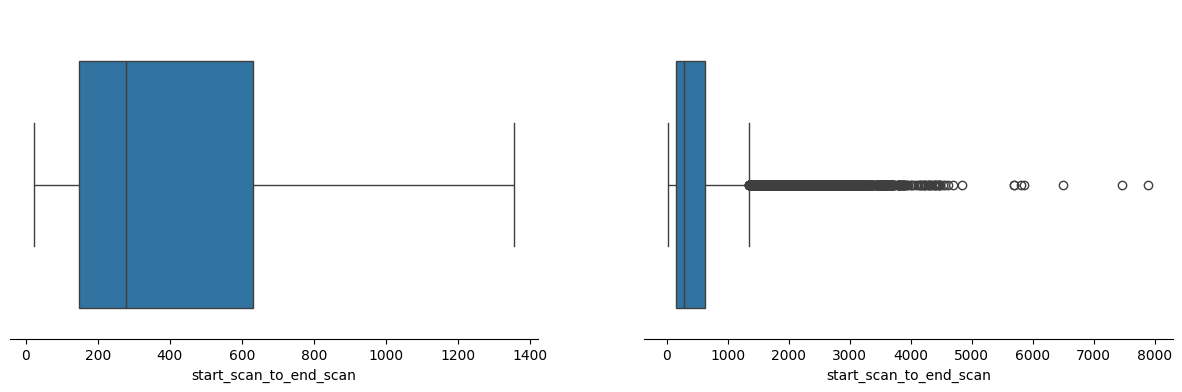

Clipped data of actual_distance_to_destination


,actual_distance_to_destination
0,374.812497
1,73.186911
2,374.812497
3,17.175274
4,127.448500
...,...
14782,57.762332
14783,15.513784
14784,38.684839
14785,134.723836



Filtered data of actual_distance_to_destination


,actual_distance_to_destination
0,824.732854
1,73.186911
2,1927.404273
3,17.175274
4,127.448500
...,...
14782,57.762332
14783,15.513784
14784,38.684839
14785,134.723836


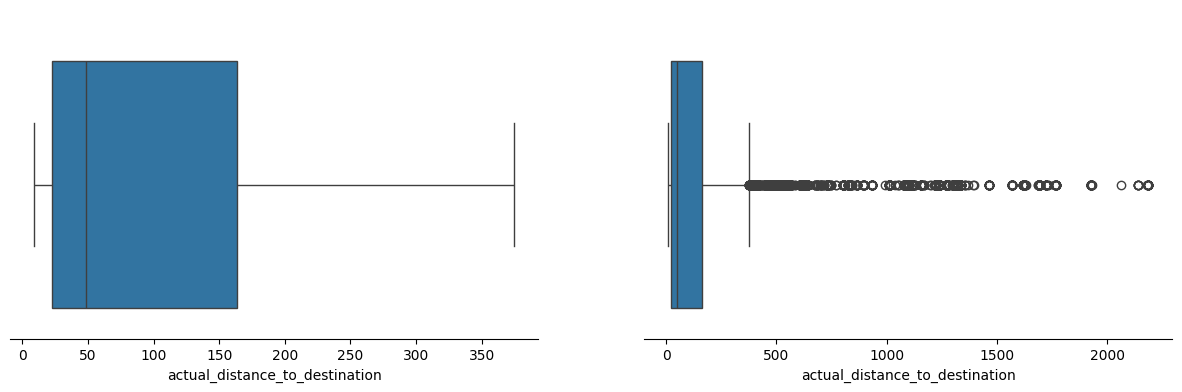

Clipped data of actual_time


,actual_time
0,817.0
1,143.0
2,817.0
3,59.0
4,341.0
...,...
14782,83.0
14783,21.0
14784,282.0
14785,264.0



Filtered data of actual_time


,actual_time
0,1562.0
1,143.0
2,3347.0
3,59.0
4,341.0
...,...
14782,83.0
14783,21.0
14784,282.0
14785,264.0


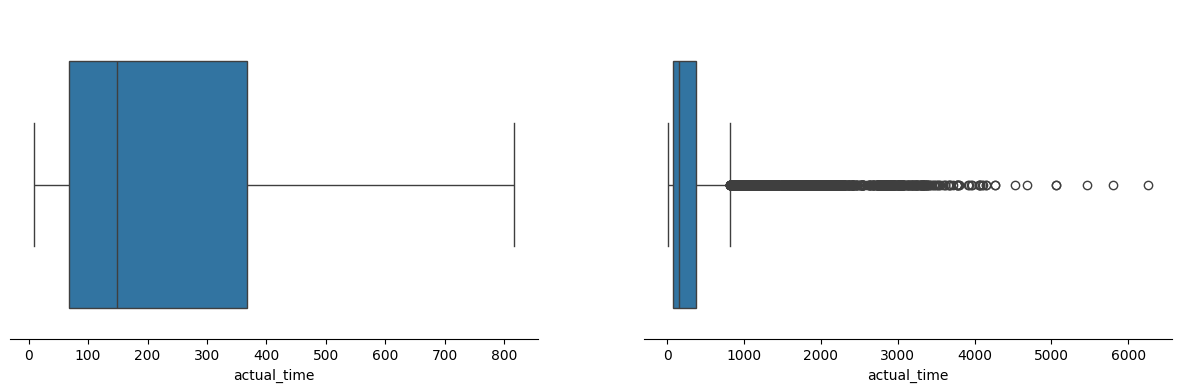

Clipped data of osrm_time


,osrm_time
0,376.5
1,68.0
2,376.5
3,15.0
4,117.0
...,...
14782,62.0
14783,12.0
14784,48.0
14785,179.0



Filtered data of osrm_time


,osrm_time
0,717.0
1,68.0
2,1740.0
3,15.0
4,117.0
...,...
14782,62.0
14783,12.0
14784,48.0
14785,179.0


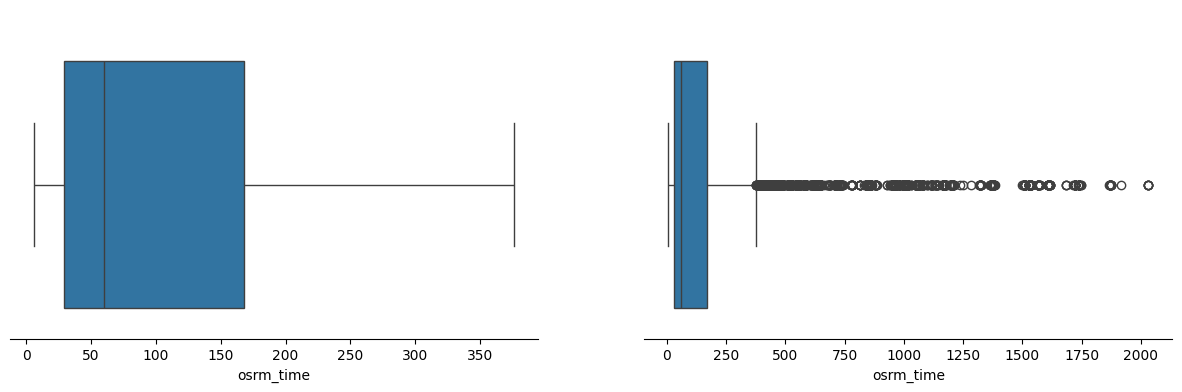

Clipped data of osrm_distance


,osrm_distance
0,470.47515
1,85.11100
2,470.47515
3,19.68000
4,146.79180
...,...
14782,73.46300
14783,16.08820
14784,58.90370
14785,171.11030



Filtered data of osrm_distance


,osrm_distance
0,991.3523
1,85.1110
2,2354.0665
3,19.6800
4,146.7918
...,...
14782,73.4630
14783,16.0882
14784,58.9037
14785,171.1103


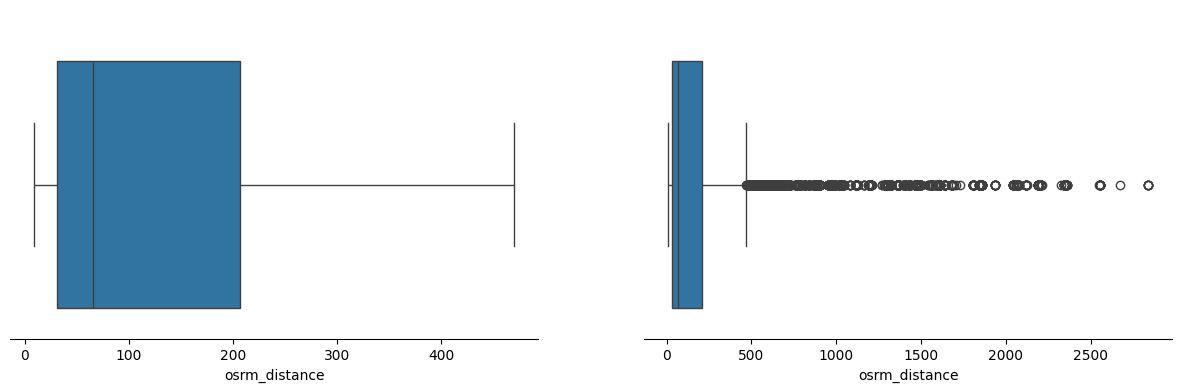

Clipped data of segment_actual_time


,segment_actual_time
0,811.0
1,141.0
2,811.0
3,59.0
4,340.0
...,...
14782,82.0
14783,21.0
14784,281.0
14785,258.0



Filtered data of segment_actual_time


,segment_actual_time
0,1548.0
1,141.0
2,3308.0
3,59.0
4,340.0
...,...
14782,82.0
14783,21.0
14784,281.0
14785,258.0


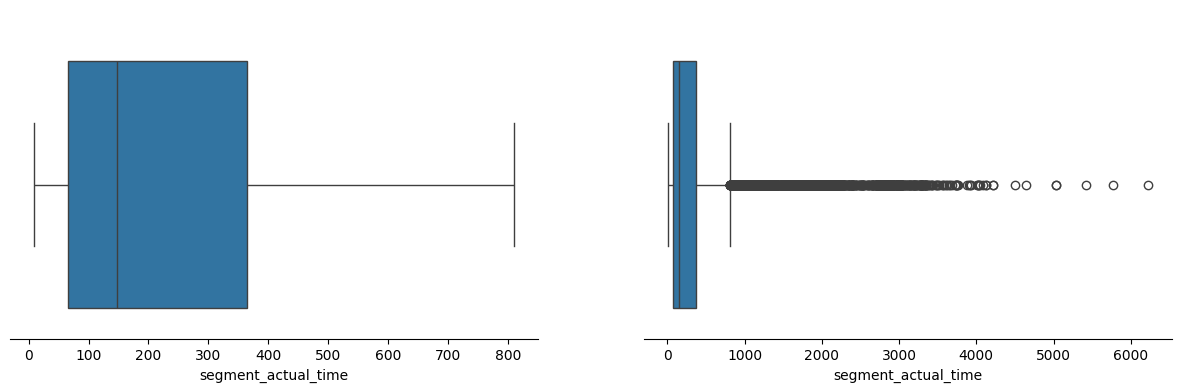

Clipped data of segment_osrm_time


,segment_osrm_time
0,415.0
1,65.0
2,415.0
3,16.0
4,115.0
...,...
14782,62.0
14783,11.0
14784,88.0
14785,221.0



Filtered data of segment_osrm_time


,segment_osrm_time
0,1008.0
1,65.0
2,1941.0
3,16.0
4,115.0
...,...
14782,62.0
14783,11.0
14784,88.0
14785,221.0


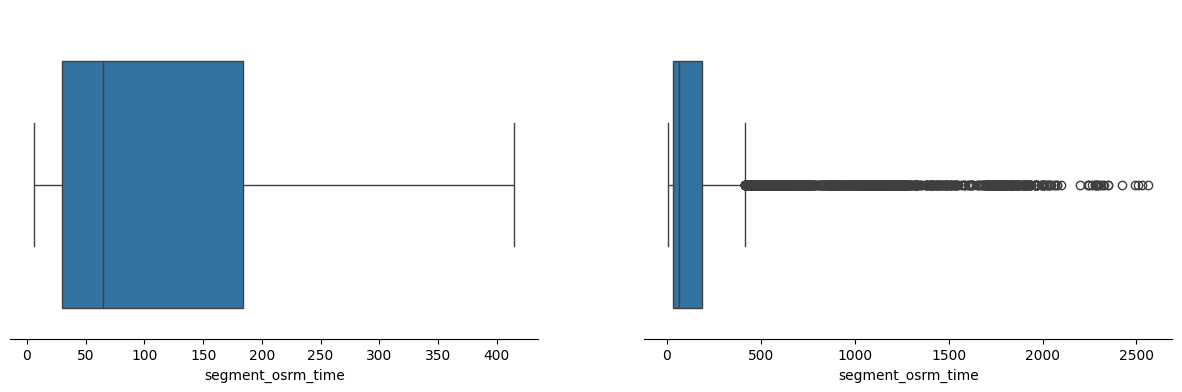

Clipped data of segment_osrm_distance


,segment_osrm_distance
0,492.533225
1,84.189400
2,492.533225
3,19.876600
4,146.791900
...,...
14782,64.855100
14783,16.088300
14784,104.886600
14785,223.532400



Filtered data of segment_osrm_distance


,segment_osrm_distance
0,1320.4733
1,84.1894
2,2545.2678
3,19.8766
4,146.7919
...,...
14782,64.8551
14783,16.0883
14784,104.8866
14785,223.5324


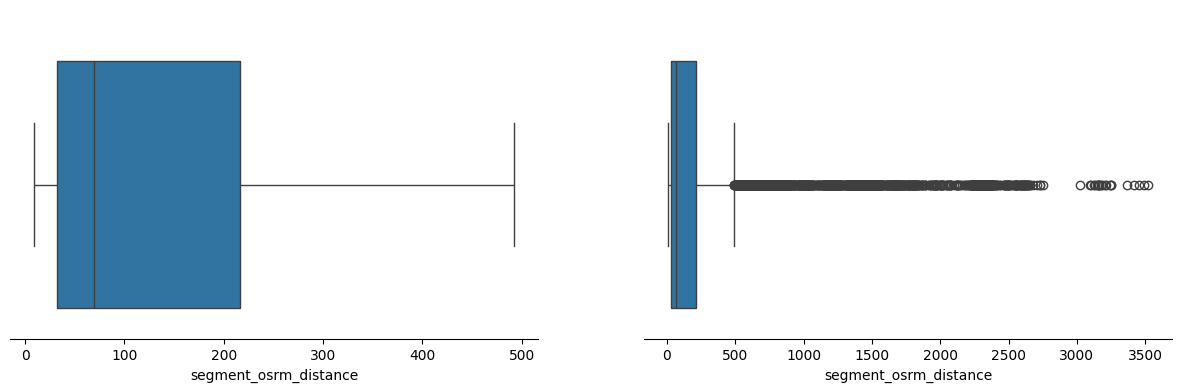

Clipped data of segment_actual_time_sum


,segment_actual_time_sum
0,811.0
1,141.0
2,811.0
3,59.0
4,340.0
...,...
14782,82.0
14783,21.0
14784,281.0
14785,258.0



Filtered data of segment_actual_time_sum


,segment_actual_time_sum
0,1548.0
1,141.0
2,3308.0
3,59.0
4,340.0
...,...
14782,82.0
14783,21.0
14784,281.0
14785,258.0


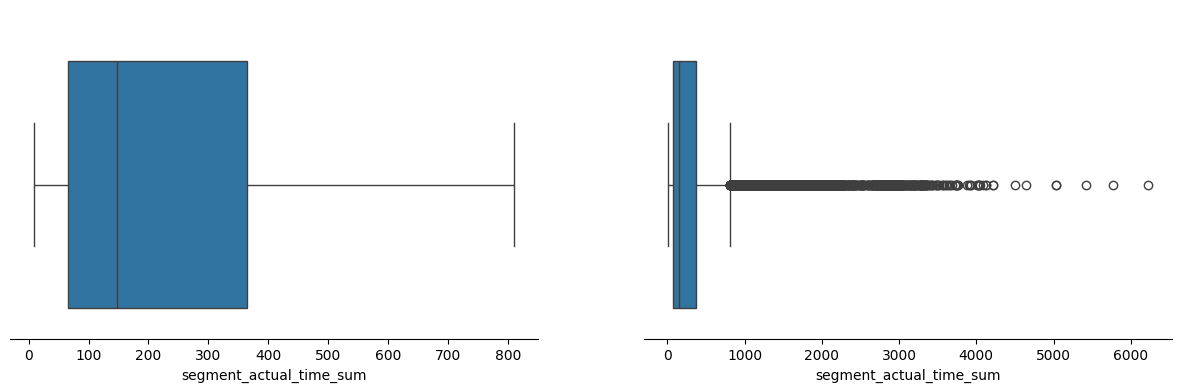

Clipped data of segment_osrm_time_sum


,segment_osrm_time_sum
0,415.0
1,65.0
2,415.0
3,16.0
4,115.0
...,...
14782,62.0
14783,11.0
14784,88.0
14785,221.0



Filtered data of segment_osrm_time_sum


,segment_osrm_time_sum
0,1008.0
1,65.0
2,1941.0
3,16.0
4,115.0
...,...
14782,62.0
14783,11.0
14784,88.0
14785,221.0


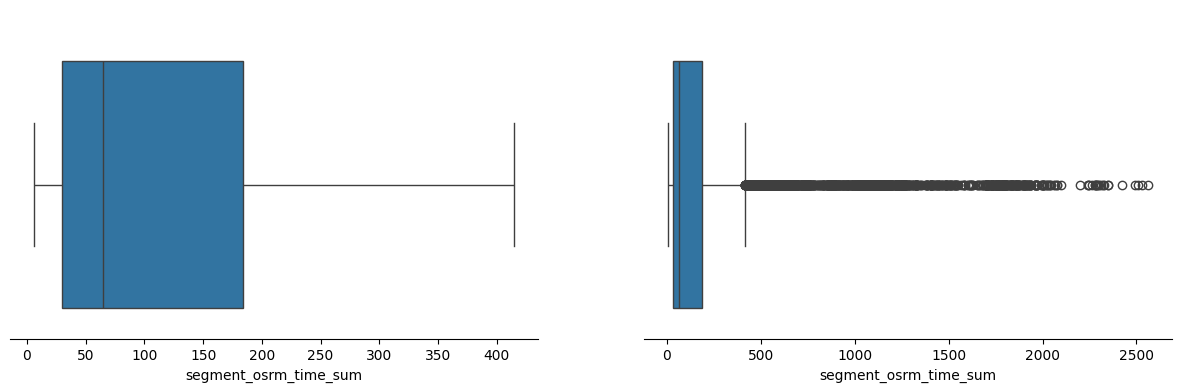

Clipped data of segment_osrm_distance_sum


,segment_osrm_distance_sum
0,492.533225
1,84.189400
2,492.533225
3,19.876600
4,146.791900
...,...
14782,64.855100
14783,16.088300
14784,104.886600
14785,223.532400



Filtered data of segment_osrm_distance_sum


,segment_osrm_distance_sum
0,1320.4733
1,84.1894
2,2545.2678
3,19.8766
4,146.7919
...,...
14782,64.8551
14783,16.0883
14784,104.8866
14785,223.5324


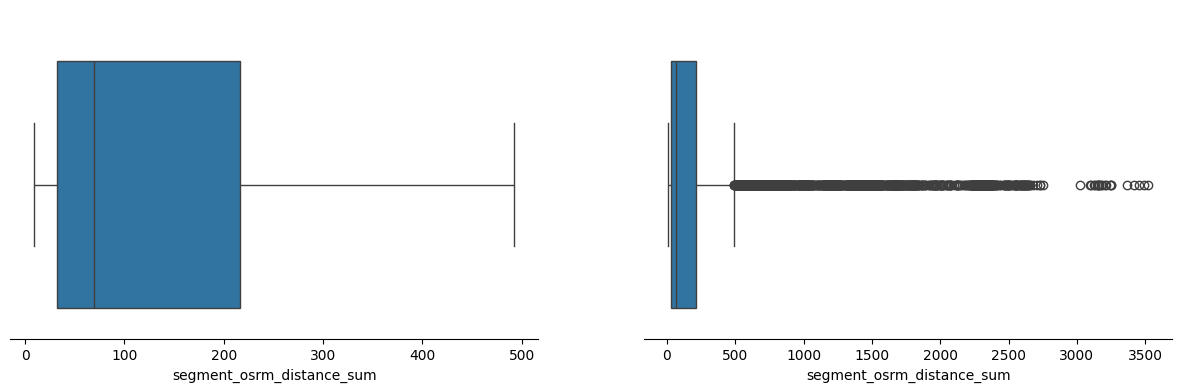

In [ ]:
for col in numerical_columns:

    data = trip_df[col]
    #display(data.to_frame())


    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1


    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    clipped_data = np.clip(data, lower_bound, upper_bound)
    print(f'Clipped data of {col}')
    display(clipped_data.to_frame())
    print()

    # Plot boxplot of the clipped data
    plt.figure(figsize=(15, 4))
    plt.subplot(121)
    sns.boxplot(x=clipped_data)
    sns.despine(left=True)
    plt.yticks([])
    plt.title(f'Boxplot of clipped {col}', fontfamily='serif', fontweight='bold', fontsize=12, color='w')

    filtered_data = data.loc[(data >= lower_bound) | (data <= upper_bound)]
    print(f'Filtered data of {col}')
    display(filtered_data.to_frame())
    print()

    plt.subplot(122)
    sns.boxplot(x=filtered_data)
    sns.despine(left=True)
    plt.yticks([])
    plt.title(f'Boxplot of filtered {col}', fontfamily='serif', fontweight='bold', fontsize=12, color='w')

    plt.show()

In [ ]:
num_df = numerical_columns.copy()
num_df

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,37.668497,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,1548.0,1008.0,1320.4733
1,3.026865,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,141.0,65.0,84.1894
2,65.572709,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,3308.0,1941.0,2545.2678
3,1.674916,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,59.0,16.0,19.8766
4,11.972484,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,4.300482,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,82.0,62.0,64.8551
14783,1.009842,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,21.0,11.0,16.0883
14784,7.035331,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,281.0,88.0,104.8866
14785,5.808548,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,258.0,221.0,223.5324


In [ ]:
Q1 = np.percentile(num_df[num_cols], 25)
Q3 = np.percentile(num_df[num_cols], 75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

clipped_num_df = np.clip(num_df[num_cols], lower_bound, upper_bound)
display(clipped_num_df)

filtered_num_df = num_df[num_cols][(num_df[num_cols] >= lower_bound) | (num_df[num_cols] <= upper_bound)]
display(filtered_num_df)

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,37.668497,543.285287,543.285287,543.285287,543.285287,543.285287,543.285287,543.285287,543.285287,543.285287,543.285287,543.285287
1,3.026865,180.000000,73.186911,143.000000,68.000000,85.111000,141.000000,65.000000,84.189400,141.000000,65.000000,84.189400
2,65.572709,543.285287,543.285287,543.285287,543.285287,543.285287,543.285287,543.285287,543.285287,543.285287,543.285287,543.285287
3,1.674916,100.000000,17.175274,59.000000,15.000000,19.680000,59.000000,16.000000,19.876600,59.000000,16.000000,19.876600
4,11.972484,543.285287,127.448500,341.000000,117.000000,146.791800,340.000000,115.000000,146.791900,340.000000,115.000000,146.791900
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,4.300482,257.000000,57.762332,83.000000,62.000000,73.463000,82.000000,62.000000,64.855100,82.000000,62.000000,64.855100
14783,1.009842,60.000000,15.513784,21.000000,12.000000,16.088200,21.000000,11.000000,16.088300,21.000000,11.000000,16.088300
14784,7.035331,421.000000,38.684839,282.000000,48.000000,58.903700,281.000000,88.000000,104.886600,281.000000,88.000000,104.886600
14785,5.808548,347.000000,134.723836,264.000000,179.000000,171.110300,258.000000,221.000000,223.532400,258.000000,221.000000,223.532400


,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,37.668497,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,1548.0,1008.0,1320.4733
1,3.026865,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,141.0,65.0,84.1894
2,65.572709,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,3308.0,1941.0,2545.2678
3,1.674916,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,59.0,16.0,19.8766
4,11.972484,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,4.300482,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,82.0,62.0,64.8551
14783,1.009842,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,21.0,11.0,16.0883
14784,7.035331,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,281.0,88.0,104.8866
14785,5.808548,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,258.0,221.0,223.5324


In [ ]:
filtered_df_corr = filtered_num_df.corr()
filtered_df_corr

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
od_time_diff_hour,1.000000,0.999837,0.918644,0.961223,0.926973,0.924683,0.961288,0.918921,0.919665,0.961288,0.918921,0.919665
start_scan_to_end_scan,0.999837,1.000000,0.919159,0.961612,0.927471,0.925205,0.961634,0.919429,0.920191,0.961634,0.919429,0.920191
actual_distance_to_destination,0.918644,0.919159,1.000000,0.953920,0.993568,0.997268,0.952987,0.987542,0.993068,0.952987,0.987542,0.993068
actual_time,0.961223,0.961612,0.953920,1.000000,0.958781,0.959398,0.999989,0.954044,0.957151,0.999989,0.954044,0.957151
osrm_time,0.926973,0.927471,0.993568,0.958781,1.000000,0.997588,0.957955,0.993263,0.991624,0.957955,0.993263,0.991624
osrm_distance,0.924683,0.925205,0.997268,0.959398,0.997588,1.000000,0.958540,0.991802,0.994712,0.958540,0.991802,0.994712
segment_actual_time,0.961288,0.961634,0.952987,0.999989,0.957955,0.958540,1.000000,0.953214,0.956293,1.000000,0.953214,0.956293
segment_osrm_time,0.918921,0.919429,0.987542,0.954044,0.993263,0.991802,0.953214,1.000000,0.996098,0.953214,1.000000,0.996098
segment_osrm_distance,0.919665,0.920191,0.993068,0.957151,0.991624,0.994712,0.956293,0.996098,1.000000,0.956293,0.996098,1.000000
segment_actual_time_sum,0.961288,0.961634,0.952987,0.999989,0.957955,0.958540,1.000000,0.953214,0.956293,1.000000,0.953214,0.956293


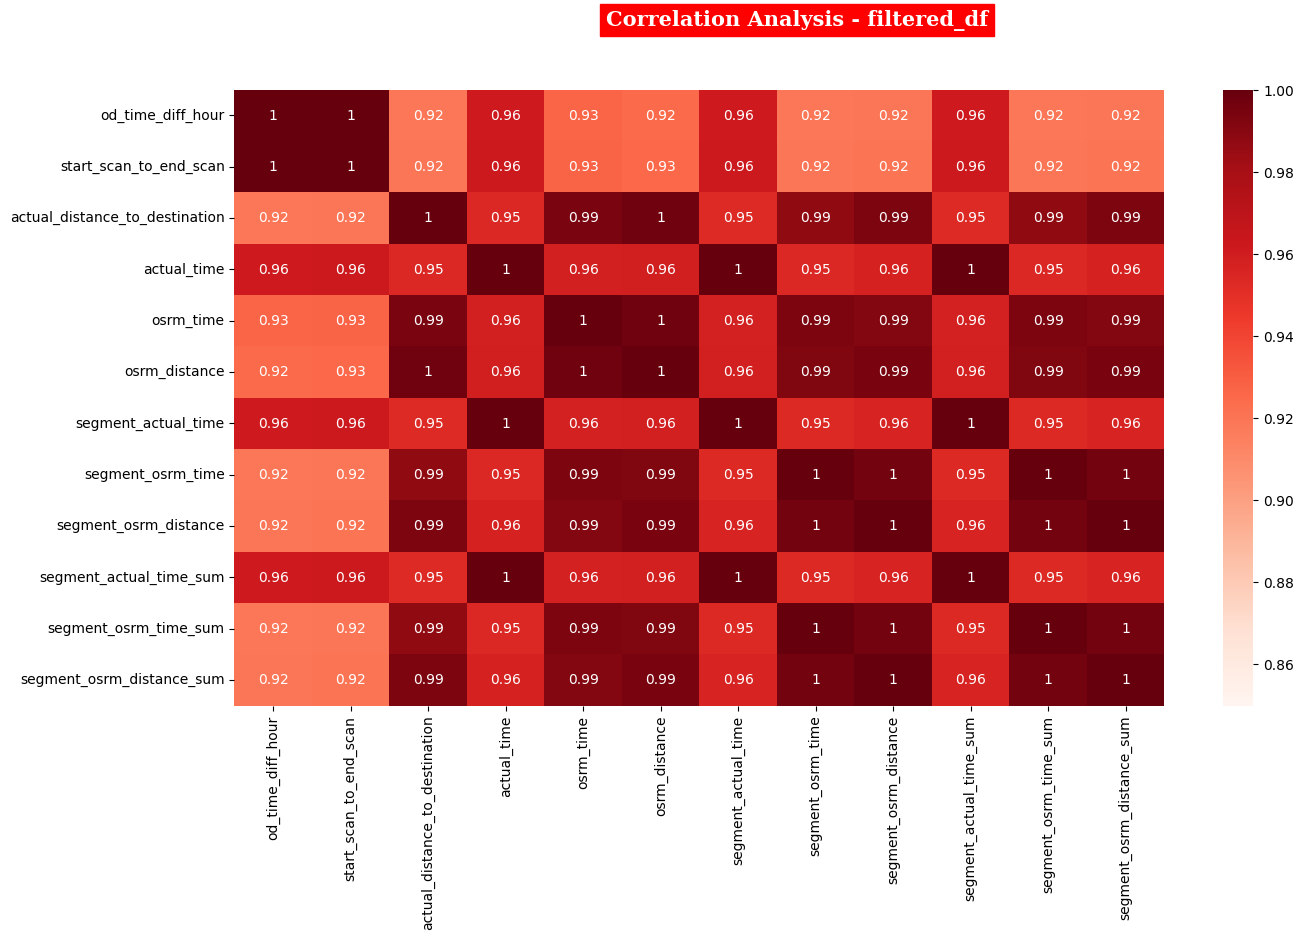

In [ ]:
plt.figure(figsize = (15,8))
plt.suptitle(f'Correlation Analysis - filtered_df',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='r',color='w')
sns.heatmap(data = filtered_df_corr,vmin=0.85, annot = True, cmap='Reds')
plt.show()

**Insights:**

- Very High Correlation exists between all the numerical columns.

###**One-hot encoding**

In [ ]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  category      
 2   route_type                      14787 non-null  category      
 3   od_start_time                   14787 non-null  datetime64[ns]
 4   od_end_time                     14787 non-null  datetime64[ns]
 5   od_time_diff_hour               14787 non-null  float64       
 6   trip_creation_time              14787 non-null  datetime64[ns]
 7   trip_creation_month             14787 non-null  int32         
 8   trip_creation_year              14787 non-null  int32         
 9   trip_creation_day               14787 non-null  int32         
 10  trip_creation_hour              14787 non-null  int32         
 11  tr

In [ ]:
#categorical columns
cat_cols= ['data','route_type']

In [ ]:
ohe = OneHotEncoder(sparse_output=False )
encoded_cat_cols = ohe.fit_transform(trip_df[cat_cols])

categorical_encoded_df = pd.DataFrame(encoded_cat_cols, columns=ohe.get_feature_names_out(cat_cols))
display(categorical_encoded_df)

encoded_df = pd.concat([trip_df,categorical_encoded_df],axis=1)
encoded_df

,data_test,data_training,route_type_Carting,route_type_FTL
0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0
...,...,...,...,...
14782,1.0,0.0,1.0,0.0
14783,1.0,0.0,1.0,0.0
14784,1.0,0.0,1.0,0.0
14785,1.0,0.0,1.0,0.0


,trip_uuid,data,route_type,od_start_time,od_end_time,od_time_diff_hour,trip_creation_time,trip_creation_month,trip_creation_year,trip_creation_day,...,destination_city,destination_state,destination_place,corridor,state_corridor,city_corridor,data_test,data_training,route_type_Carting,route_type_FTL
0,trip-153671041653548748,training,FTL,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,37.668497,2018-09-12 00:00:16.535741,9,2018,12,...,Gurgaon,Haryana,Bilaspur_HB,Kanpur_Central_H_6 (Uttar Pradesh)<---->Gurgao...,Uttar Pradesh--Kanpur <---> Haryana--Gurgaon,Kanpur--Central_H_6 <---> Gurgaon--Bilaspur_HB,0.0,1.0,0.0,1.0
1,trip-153671042288605164,training,Carting,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,3.026865,2018-09-12 00:00:22.886430,9,2018,12,...,Chikblapur,Karnataka,ShntiSgr_D,Doddablpur_ChikaDPP_D (Karnataka)<---->Chikbla...,Karnataka--Doddablpur <---> Karnataka--Chikblapur,Doddablpur--ChikaDPP_D <---> Chikblapur--Shnti...,0.0,1.0,1.0,0.0
2,trip-153671043369099517,training,FTL,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,65.572709,2018-09-12 00:00:33.691250,9,2018,12,...,Chandigarh,Punjab,Mehmdpur_H,Gurgaon_Bilaspur_HB (Haryana)<---->Chandigarh_...,Haryana--Gurgaon <---> Punjab--Chandigarh,Gurgaon--Bilaspur_HB <---> Chandigarh--Mehmdpur_H,0.0,1.0,0.0,1.0
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1.674916,2018-09-12 00:01:00.113710,9,2018,12,...,Mumbai,Maharashtra,MiraRd_IP,Mumbai Hub (Maharashtra)<---->Mumbai_MiraRd_IP...,Maharashtra--Mumbai Hub <---> Maharashtra--Mumbai,Mumbai Hub--Mumbai Hub <---> Mumbai--MiraRd_IP,0.0,1.0,1.0,0.0
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,11.972484,2018-09-12 00:02:09.740725,9,2018,12,...,Hospet,Karnataka,Hospet,Bellary_Dc (Karnataka)<---->Hospet (Karnataka),Karnataka--Bellary <---> Karnataka--Hospet,Bellary--Dc <---> Hospet--Hospet,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,Carting,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,4.300482,2018-10-03 23:55:56.258533,10,2018,3,...,Zirakpur,Punjab,DC,Chandigarh_Mehmdpur_H (Punjab)<---->Zirakpur_D...,Punjab--Chandigarh <---> Punjab--Zirakpur,Chandigarh--Mehmdpur_H <---> Zirakpur--DC,1.0,0.0,1.0,0.0
14783,trip-153861104386292051,test,Carting,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,1.009842,2018-10-03 23:57:23.863155,10,2018,3,...,Faridabad,Haryana,Blbgarh_DC,FBD_Balabhgarh_DPC (Haryana)<---->Faridabad_Bl...,Haryana--FBD <---> Haryana--Faridabad,FBD--Balabhgarh_DPC <---> Faridabad--Blbgarh_DC,1.0,0.0,1.0,0.0
14784,trip-153861106442901555,test,Carting,2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,7.035331,2018-10-03 23:57:44.429324,10,2018,3,...,Kanpur,Uttar Pradesh,Central_H_6,Kanpur_GovndNgr_DC (Uttar Pradesh)<---->Kanpur...,Uttar Pradesh--Kanpur <---> Uttar Pradesh--Kanpur,Kanpur--GovndNgr_DC <---> Kanpur--Central_H_6,1.0,0.0,1.0,0.0
14785,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,5.808548,2018-10-03 23:59:14.390954,10,2018,3,...,Eral,Tamil Nadu,Busstand_D,Tirunelveli_VdkkuSrt_I (Tamil Nadu)<---->Eral_...,Tamil Nadu--Tirunelveli <---> Tamil Nadu--Eral,Tirunelveli--VdkkuSrt_I <---> Eral--Busstand_D,1.0,0.0,1.0,0.0


#### **Standardization:**

In [ ]:
scaler=MinMaxScaler()
std_data=scaler.fit_transform(trip_df[num_cols])
std_data=pd.DataFrame(std_data, columns=num_cols)
std_data

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,0.284016,0.283937,0.374613,0.248242,0.350938,0.346972,0.247388,0.391712,0.373134,0.247388,0.391712,0.373134
1,0.020082,0.019937,0.029476,0.021419,0.030602,0.026859,0.021218,0.023065,0.021373,0.021218,0.023065,0.021373
2,0.496617,0.496508,0.880999,0.533568,0.855874,0.828325,0.530301,0.756450,0.721625,0.530301,0.756450,0.721625
3,0.009782,0.009778,0.003753,0.007992,0.004442,0.003747,0.008037,0.003909,0.003074,0.008037,0.003909,0.003074
4,0.088239,0.088127,0.054395,0.053069,0.054788,0.048647,0.053207,0.042611,0.039185,0.053207,0.042611,0.039185
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,0.029786,0.029714,0.022392,0.011829,0.027641,0.022745,0.011734,0.021892,0.015872,0.011734,0.021892,0.015872
14783,0.004715,0.004698,0.002990,0.001918,0.002962,0.002478,0.001929,0.001955,0.001996,0.001929,0.001955,0.001996
14784,0.050623,0.050540,0.013631,0.043638,0.020731,0.017602,0.043723,0.032056,0.027262,0.043723,0.032056,0.027262
14785,0.041276,0.041143,0.057736,0.040761,0.085390,0.057237,0.040026,0.084050,0.061020,0.040026,0.084050,0.061020


### **Business Insights**

- The timeframe of the data spans from '2018-09-12' to '2018-10-08', totaling 26 days.
- 88% of the trips occurred in October, while the remaining trips took place in November.
- The analysis indicates that a greater proportion of shipments are routed via Full Truck Load (FTL) compared to carting, which has significant implications for the efficiency and speed of the delivery process.
- The states of Haryana, Maharashtra, and Karnataka not only serve as busy source states but also emerge as the busiest, reflecting a high demand or substantial business activities originating from these regions.
- Gurgaon, Bangalore, and Bhiwandi are identified as the busiest source cities, indicating their crucial role in overall business operations and transportation activities.
- Gurgaon, Bangalore, and Hyderabad are recognized as the busiest destination cities, highlighting their importance in terms of business activities and population movement.
- The busiest route is from Bangalore_Nalamngla_H (Karnataka) to Bengaluru_KGAirport_HB (Karnataka), with an average distance of 28.03 km and an average travel time of 87.87 minutes.

### **Business Recommendations:**

- Optimize the transportation network within Karnataka to improve efficiency and reduce congestion using route optimization algorithms and real-time traffic monitoring.
- Implement city-specific strategies to manage high traffic volumes in Gurgaon (source city) and Bangalore (destination city).
Set more realistic delivery time expectations, as the mean OSRM time is less than the mean actual delivery time.
- Adjust distance estimations for logistics planning since the mean OSRM distance is greater than the mean actual distance.
- Use information from segment-specific OSRM distances and actual distances to refine route planning and optimize logistics.
- Implement advanced demand forecasting techniques to anticipate peak travel times and adjust transportation services accordingly.
- Improve accuracy in estimated delivery times and distances to enhance customer satisfaction.
- A higher proportion of FTL shipments leads to faster delivery times, aligning with customer expectations for timely deliveries.
- Conduct customer profiling for states like Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh to understand major order origins and improve the buying and delivery experience.
- Analyze differences between estimated and actual times/distances to aid in cost optimization.
- Fine-tune logistics planning based on accurate measurements to enhance resource allocation and reduce operational costs.
- Understand the strategic choice of FTL over carting to inform future decision-making processes.
- Collaborate with stakeholders, including government authorities, transportation companies, and local communities, to develop comprehensive strategies for managing and optimizing transportation in busy corridors and cities.